## VSNeobank's project

**Project summary:** VSNeobank’s needs are dealing with high competition in banking market, current high customer attrition, they need to predict who is likely to close their accounts to instantly have preventing actions towards those customers. Dataset is collected from customers and their transactions which indicate their behavior patterns. By analysing historical data, VSNeoBank expects to understand their customers more by identifing their patterns, behaviours. Predictive analytics based on EDA and predictive models is generated to classify customers’ accounts status into closed or active. By predicting customers' accounts status, VSNeobank could instantly act and response to customers’ behaviors to hold them back with appropriate offers and improved experiences. By doing so, VSNeobank could improve their sales revenue, reputation, customer's relationship and  furthermore, offers and promotions could accurately benefit only needed people to minimize any inappropriate offers. Stakeholders in this case are Head of VSNeoBank Data Analytics who is interested in their data exploration for further application and Head of Customer Experience who is looking for recommendations to improve customers retention. To overcome the contexts and archive values, stakeholders need to take place the change such as deployment of machine learning algorithms to make predictions, adoptions of some appropriate offers and promotions for possible “about to leave” customers.

<a id = "cell_exploration"></a>
## 1. Data understanding, preparation, explorations and visualisation


In [1]:
 #interface for graph visualisation
 !pip install pydotplus
 #for graph visualisation
 !pip install graphviz
 #Load requires libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation
from sklearn.metrics import precision_recall_curve, precision_recall_curve, classification_report
from sklearn.metrics import classification_report, confusion_matrix



In [2]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.1 Data understanding

In [3]:
#Load dataset
records= pd.read_csv("/content/drive/MyDrive/MIS710/VSNeoBank (1).csv")

In [4]:
#explore the dataset
print(records)

      CustomerID Sex  Age Marital Status  Number of Dependants  \
0     1621953962   M   51        Married                     2   
1     1599451862   M   46        Married                     3   
2     1429196012   F   49        Married                     1   
3     1417901012   M   54        Married                     3   
4     1427399912   M   47         Single                     2   
...          ...  ..  ...            ...                   ...   
8096  1417736312   M   43        Married                     3   
8097  1429146062   F   49        Married                     3   
8098  1421458712   F   49        Married                     3   
8099  1427072012   M   56        Married                     1   
8100  1437294662   M   35        Married                     4   

       Annual Income Account Type  Credit Limit  Number of Accounts  \
0        $70K - $90K       Silver        4123.0                   5   
1       $90K - $110K       Silver       19458.0                  

In [5]:
records.head(10)

,CustomerID,Sex,Age,Marital Status,Number of Dependants,Annual Income,Account Type,Credit Limit,Number of Accounts,Months since Openning,Outstanding Balance,Utilisation Ratio,Total Amount of Transactions,Total Number of Transactions,Number of Contacts over 12 months,Months Inactive over 12 months,Status
0,1621953962,M,51,Married,2,$70K - $90K,Silver,4123.0,5,46,1760,0.427,2447,40,2,3,Closed
1,1599451862,M,46,Married,3,$90K - $110K,Silver,19458.0,4,40,1435,0.074,1217,27,3,3,Active
2,1429196012,F,49,Married,1,$50K - $70K,Silver,1438.3,4,41,522,0.363,2030,37,3,3,Closed
3,1417901012,M,54,Married,3,$90K - $110K,Gold,34516.0,2,36,761,0.022,8444,68,1,3,Closed
4,1427399912,M,47,Single,2,$90K - $110K,Silver,34516.0,3,36,1264,0.037,7827,77,2,2,Active
5,1432477412,F,46,Married,1,Less than $50K,Silver,2532.0,4,37,1487,0.587,4143,71,2,2,Active
6,1432736462,F,45,Married,2,Unknown,Silver,8103.0,2,36,0,0.000,5221,82,3,1,Active
7,1431547262,M,41,Married,3,$110K and Over,Gold,34516.0,3,36,1453,0.042,4147,76,2,3,Active
8,1416980462,F,57,Married,3,Less than $50K,Silver,2515.0,5,47,1922,0.764,2231,58,3,3,Active
9,1435853912,F,48,Divorced,2,Unknown,Silver,3745.0,3,37,1291,0.345,4956,88,2,4,Active


In [6]:
#Get information of the columns
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         8101 non-null   int64  
 1   Sex                                8101 non-null   object 
 2   Age                                8101 non-null   int64  
 3   Marital Status                     8101 non-null   object 
 4   Number of Dependants               8101 non-null   int64  
 5   Annual Income                      8101 non-null   object 
 6   Account Type                       8101 non-null   object 
 7   Credit Limit                       8101 non-null   float64
 8   Number of Accounts                 8101 non-null   int64  
 9   Months since Openning              8101 non-null   int64  
 10  Outstanding Balance                8101 non-null   int64  
 11  Utilisation Ratio                  8101 non-null   float

In [7]:
#Checking if there is any missing value
print(records.isnull().sum())

CustomerID                           0
Sex                                  0
Age                                  0
Marital Status                       0
Number of Dependants                 0
Annual Income                        0
Account Type                         0
Credit Limit                         0
Number of Accounts                   0
Months since Openning                0
Outstanding Balance                  0
Utilisation Ratio                    0
Total Amount of Transactions         0
Total Number of Transactions         0
Number of Contacts over 12 months    0
Months Inactive over 12 months       0
Status                               0
dtype: int64


There is no missing value.

In [8]:
data_types =['object', 'float', 'int']
records.describe(include=data_types)

,CustomerID,Sex,Age,Marital Status,Number of Dependants,Annual Income,Account Type,Credit Limit,Number of Accounts,Months since Openning,Outstanding Balance,Utilisation Ratio,Total Amount of Transactions,Total Number of Transactions,Number of Contacts over 12 months,Months Inactive over 12 months,Status
count,8.101000e+03,8101,8101.000000,8101,8101.000000,8101,8101,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101
unique,NaN,2,NaN,4,NaN,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,F,NaN,Married,NaN,Less than $50K,Silver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active
freq,NaN,4253,NaN,3736,NaN,2812,7551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6799
mean,1.478333e+09,NaN,46.273176,NaN,2.355512,NaN,NaN,8686.277768,3.818417,35.874830,1163.520553,0.274287,4397.203308,64.877916,2.453154,2.334033,NaN
std,7.362533e+07,NaN,7.981850,NaN,1.296535,NaN,NaN,9095.531430,1.561729,7.968666,815.008448,0.276103,3390.907493,23.398471,1.109748,1.008734,NaN
min,1.416168e+09,NaN,26.000000,NaN,0.000000,NaN,NaN,1438.300000,1.000000,13.000000,0.000000,0.000000,510.000000,10.000000,0.000000,0.000000,NaN
25%,1.426247e+09,NaN,41.000000,NaN,1.000000,NaN,NaN,2570.000000,3.000000,31.000000,350.000000,0.022000,2148.000000,45.000000,2.000000,2.000000,NaN
50%,1.435927e+09,NaN,46.000000,NaN,2.000000,NaN,NaN,4592.000000,4.000000,36.000000,1282.000000,0.174000,3896.000000,67.000000,2.000000,2.000000,NaN
75%,1.545874e+09,NaN,52.000000,NaN,3.000000,NaN,NaN,11236.000000,5.000000,40.000000,1784.000000,0.504000,4739.000000,81.000000,3.000000,3.000000,NaN


The unknown values in annual income column are treated as missing at random (MAR) data as there are some people who are not willing to provide their annual income. The likelihood of MAR is only related to the observable data so they can be handled by observed predictors variables. Therefore, Unknow values in annual income is replaced by mode value in the column.

In [9]:
#Replace Unknown value in annual income column
import pandas as pd
column_name = 'Annual Income'

mode_value = records[column_name].mode().values[0]
records[column_name] = records[column_name].replace("Unknown", mode_value)

In [10]:
# Examinate the outputs
records.Status.value_counts()

Active    6799
Closed    1302
Name: Status, dtype: int64

### 1.2 Data visualisation

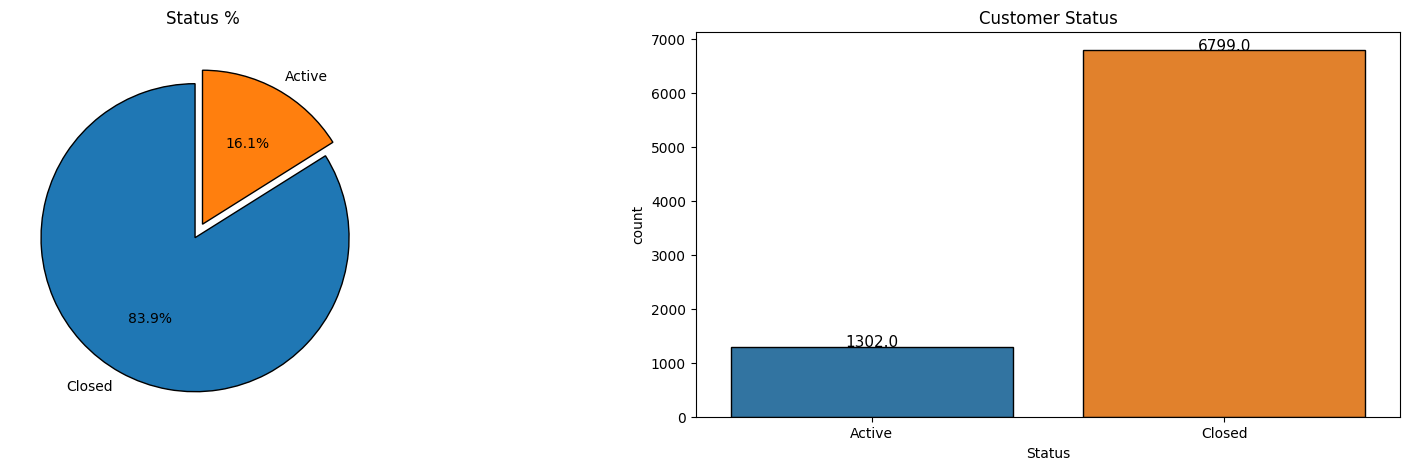

In [11]:
# Visualise the outputs
l = list(records['Status'].value_counts(1))
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Closed','Active'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Status %');
plt.subplot(1,2,2)
ax = sns.countplot(x='Status',data = records,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Active','Closed'])

plt.title('Customer Status');
plt.show()

There is an significant imbalance in the output as active is only 16.1% and closed dominates with the rate of 83.9% which requires balancing technique in model building.

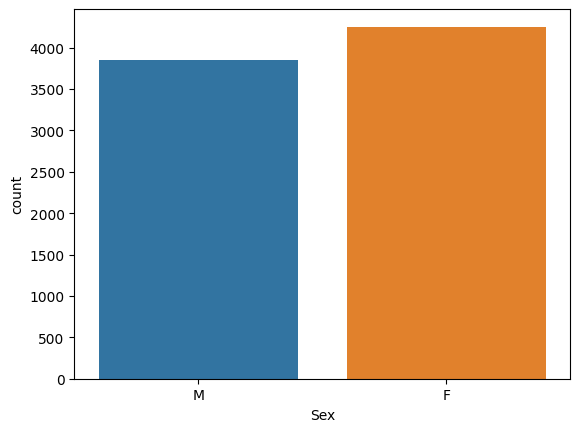

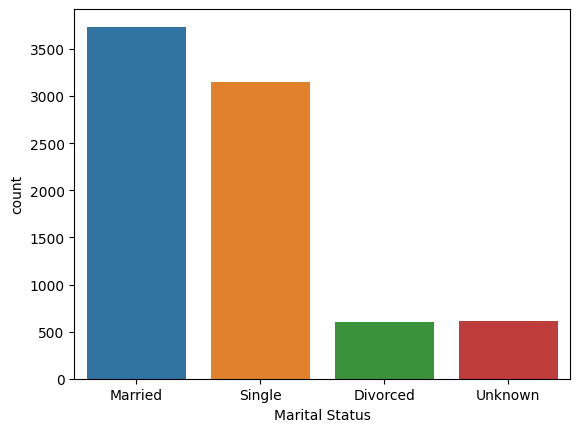

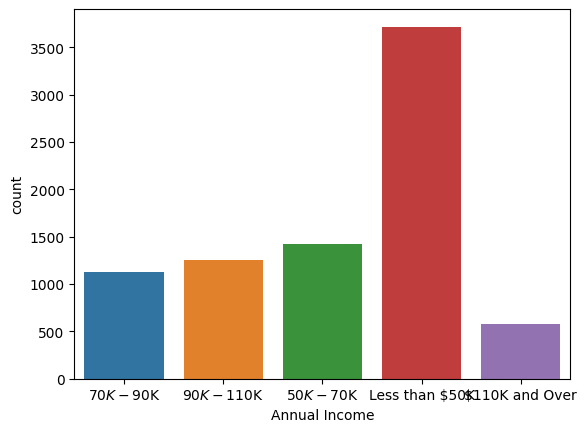

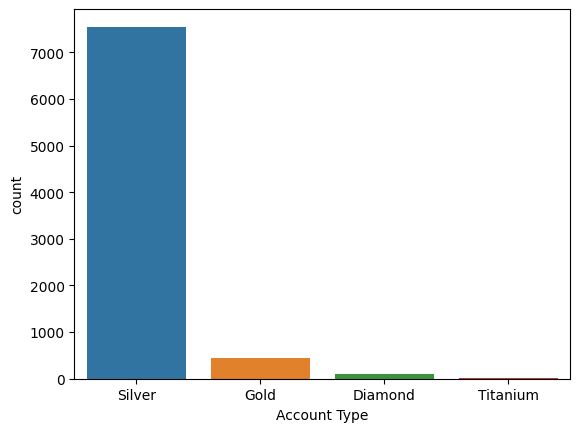

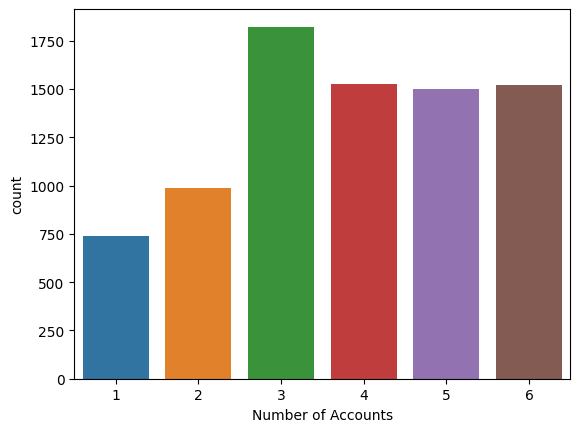

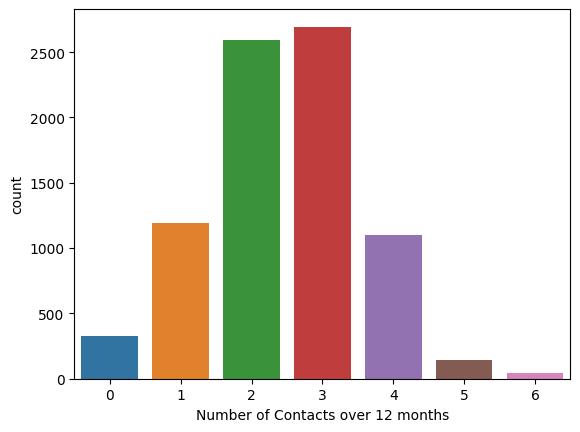

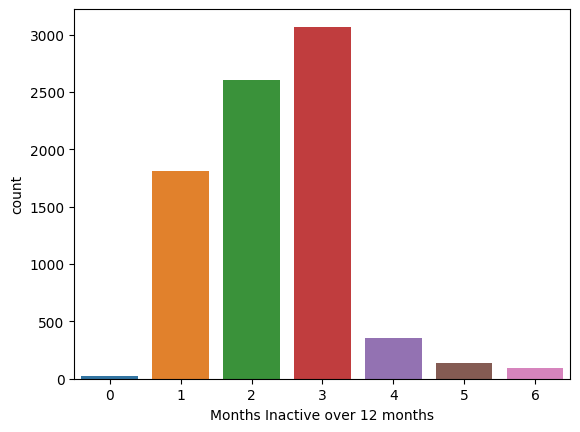

In [12]:
for i in ['Sex', 'Marital Status', 'Annual Income','Account Type', 'Number of Accounts', 'Number of Contacts over 12 months', 'Months Inactive over 12 months']:
   plt.figure()
   sns.countplot(x=records[i])

The number of male and female customers are closedly equivalent. Majority of VSNeoBank's customers are married or single with the income less than $50,000. They tend to have more than 3 accounts which are mainly silver card. VSNeobank's customers are likely to contact approximately 2 or 3 times over 12 months which indicates moderately active relationships between VSNeoBank and their customers.

<Axes: xlabel='Age', ylabel='Count'>

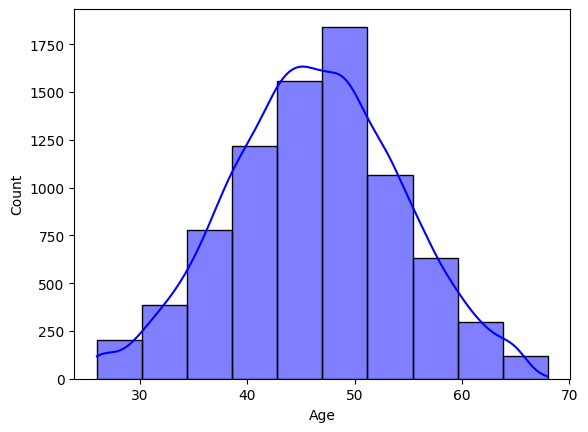

In [13]:
sns.histplot(data=records, x='Age', bins=10, kde=True, color = 'blue')

 Majority of VSNeoBank is from 40-50 years old which is different from initial target customers who are gen Z, urging VSNeoBank to examinate and modify current campaigns to retarget the right customer segment.  

<Axes: xlabel='Months since Openning', ylabel='Count'>

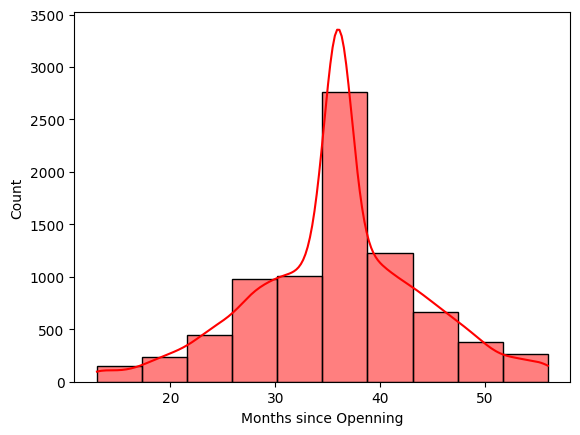

In [14]:
sns.histplot(data=records, x='Months since Openning', bins=10, kde=True, color = 'red')

Majority of customers have been with VSNeoBanks for 3 years.

<Axes: xlabel='Credit Limit', ylabel='Count'>

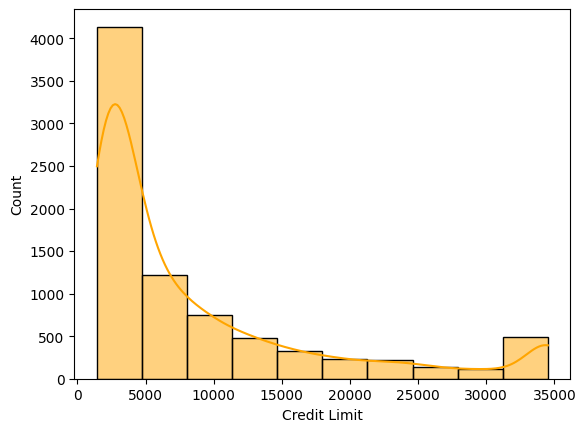

In [15]:
sns.histplot(data=records, x='Credit Limit', bins=10, kde=True, color = 'orange')

<Axes: xlabel='Outstanding Balance', ylabel='Count'>

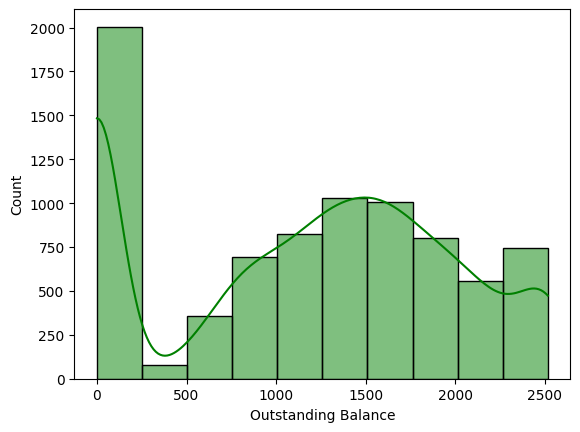

In [16]:
sns.histplot(data=records, x='Outstanding Balance', bins=10, kde=True, color = 'green')

<Axes: xlabel='Utilisation Ratio', ylabel='Count'>

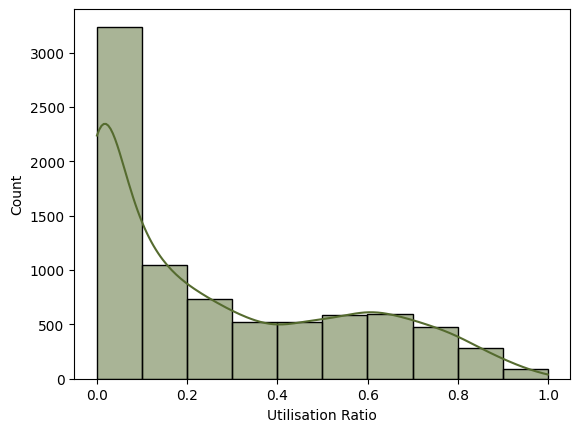

In [17]:
sns.histplot(data=records, x='Utilisation Ratio', bins=10, kde=True, color = 'darkolivegreen')

<Axes: xlabel='Total Amount of Transactions', ylabel='Count'>

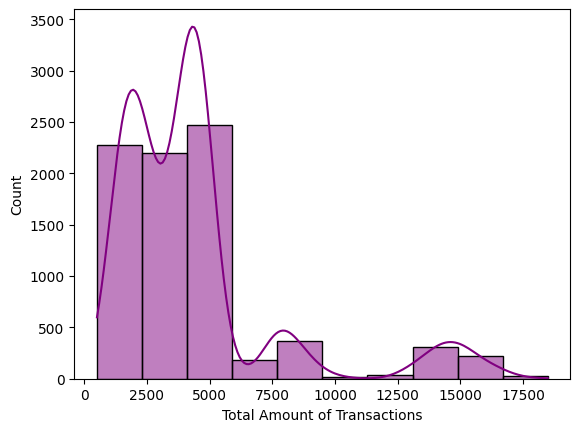

In [18]:
sns.histplot(data=records, x='Total Amount of Transactions', bins=10, kde=True, color = 'purple')

VSNeoBank's customers are likely to have credit limit at 50,000 with outstanding less than 500 which leads to the utilisation ratio is relatively low at less than 0.2; total amount of transactions are mainly at the least amount (less than $50,000). This might be the result of having 2-3 silver accounts so VSNeoBank is recommended to adjust the beginnning cost to make a transaction in an extra account to be higher than upgrading the account type, by doing so, VsNeoBank could urge their customers to afford more premium account type which could benefit customers as well as increase their loyalty to VsNeoBank.

<Axes: xlabel='Total Number of Transactions', ylabel='Count'>

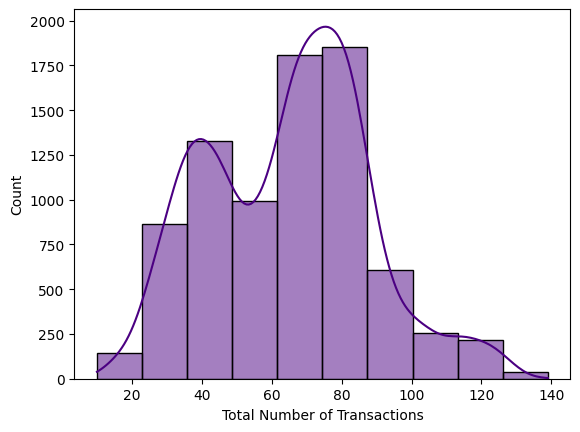

In [19]:
sns.histplot(data=records, x='Total Number of Transactions', bins=10, kde=True, color = 'indigo')

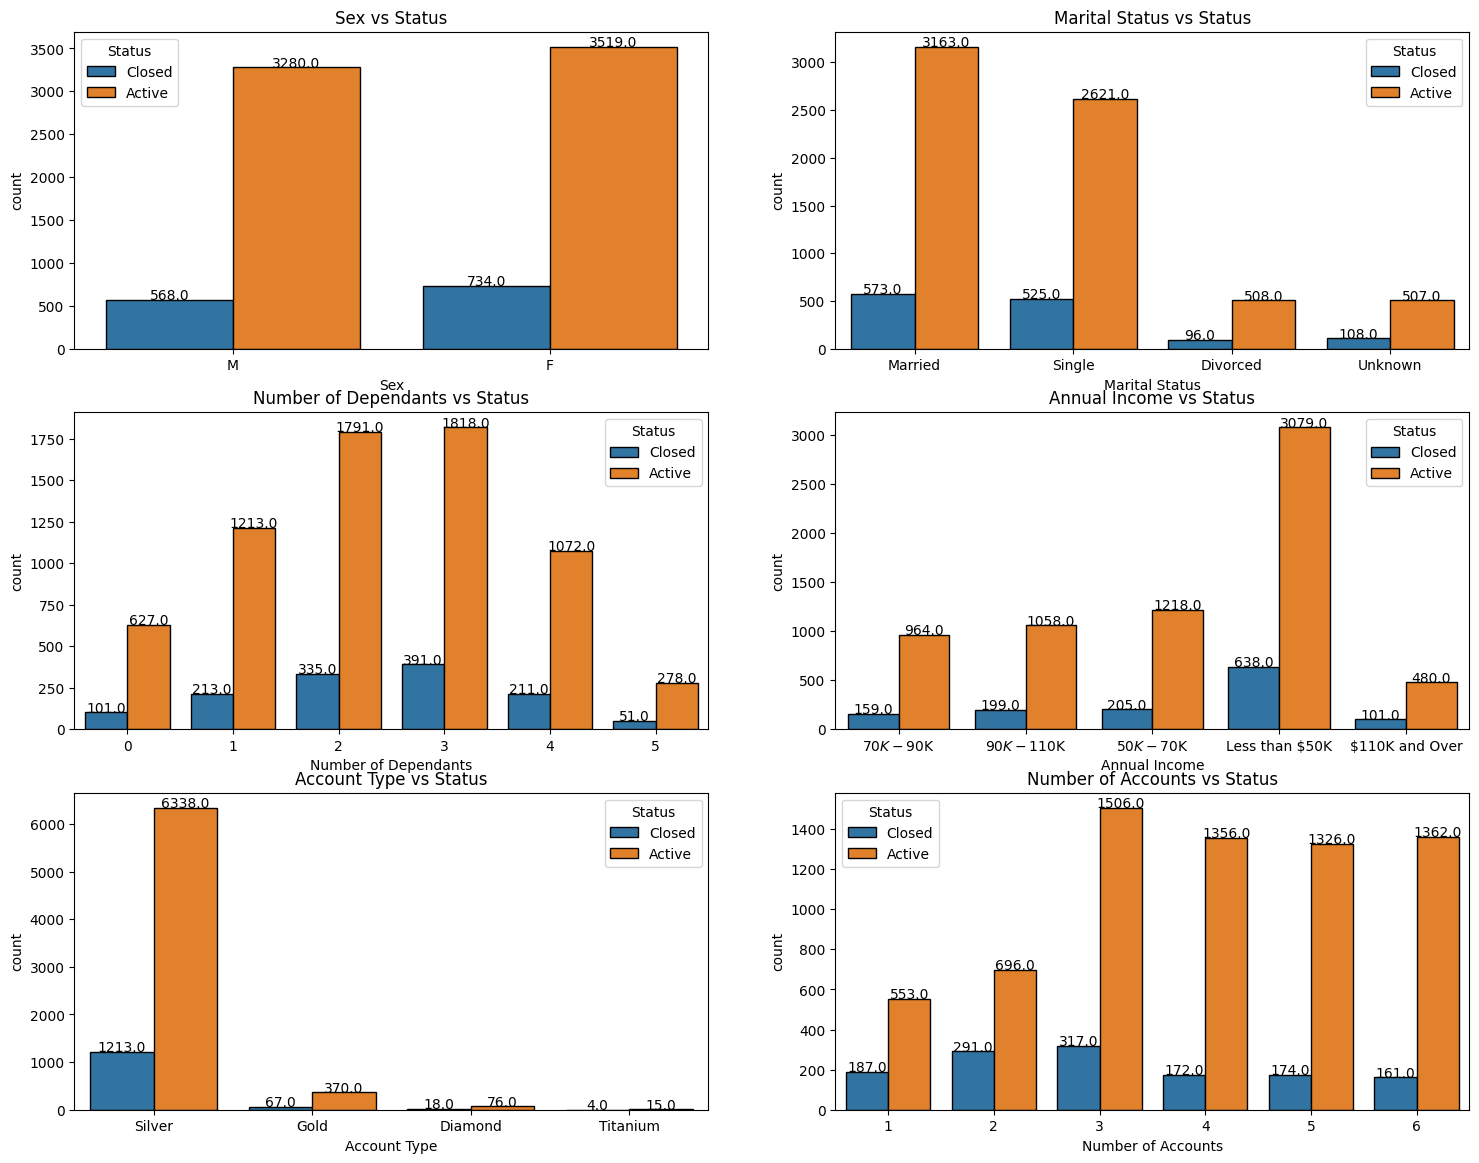

In [20]:
#Multivariate visualisation to examinate the differences in closed and active accounts
l1 = ['Sex','Marital Status','Number of Dependants', 'Annual Income', 'Account Type','Number of Accounts' ]

fig = plt.subplots(nrows = 3,ncols = 2,figsize = (18,14))
for i in range(len(l1)):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(x=l1[i],data = records,hue = "Status",edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() +2, rect.get_height(), horizontalalignment='center', fontsize = 10)
    title = l1[i] + ' vs Status'
    plt.title(title);

There are some correlations between sex, marital status,  number of accounts, marital status, number of dependents, annual income, and number of accounts as well as account type and status. However, practically all of them change due to the preponderance of active accounts in the dataset; in each categorization within characteristics, there are much more active accounts than closed accounts. Unknown marital status, on the other hand, has a higher rate of closed accounts than other types of marital status. This scenario suggests that consumers who are unwilling to provide personal information are less loyal to the bank.

<Axes: xlabel='Months Inactive over 12 months', ylabel='count'>

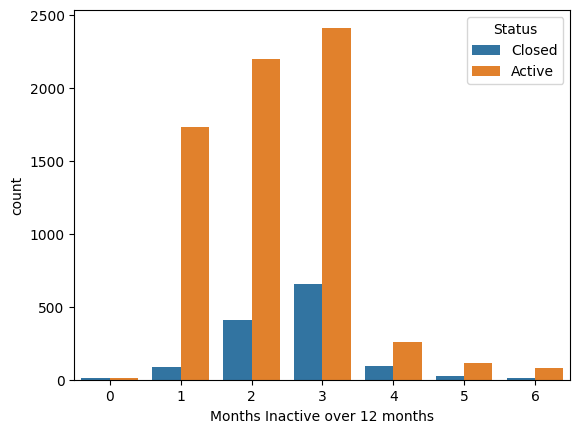

In [21]:
sns.countplot(data=records, x='Months Inactive over 12 months', hue='Status')

<Axes: xlabel='Age', ylabel='Status'>

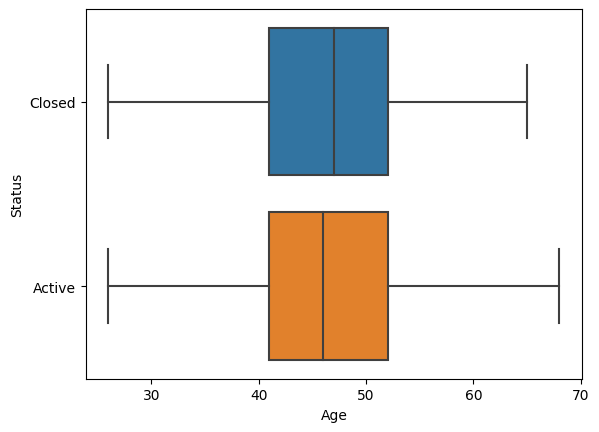

In [22]:
sns.boxplot(data=records, x='Age', y='Status')

People with an active account, on the other hand, have a lower average age than those with a closed account, indicating that VSNeobank's target clients are younger customers, or Gen Z in particular.

<Axes: xlabel='Credit Limit', ylabel='Status'>

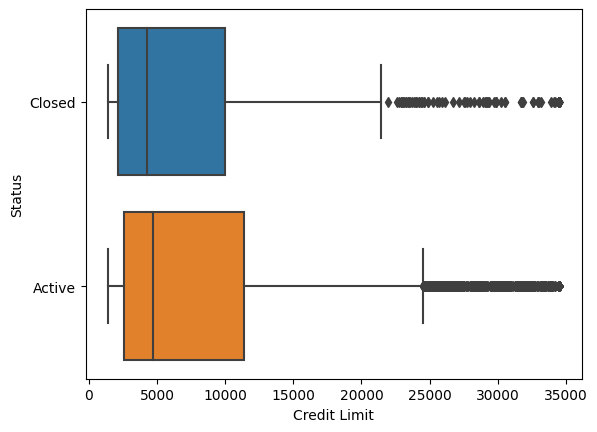

In [23]:
sns.boxplot(data=records, x='Credit Limit', y='Status')

<Axes: xlabel='Months since Openning', ylabel='Status'>

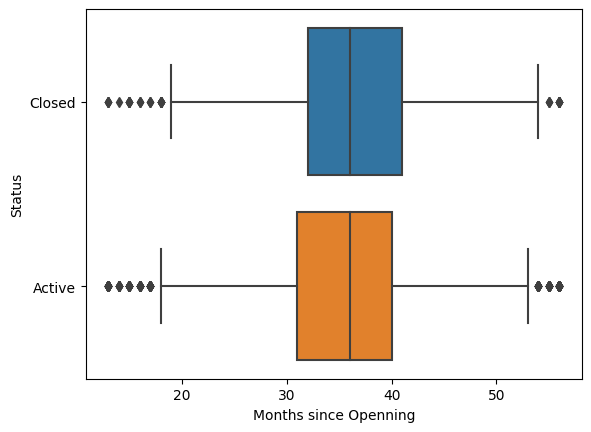

In [24]:
sns.boxplot(data=records, x='Months since Openning', y='Status')

After 3 years, more accounts are closed than kept.

<Axes: xlabel='Outstanding Balance', ylabel='Status'>

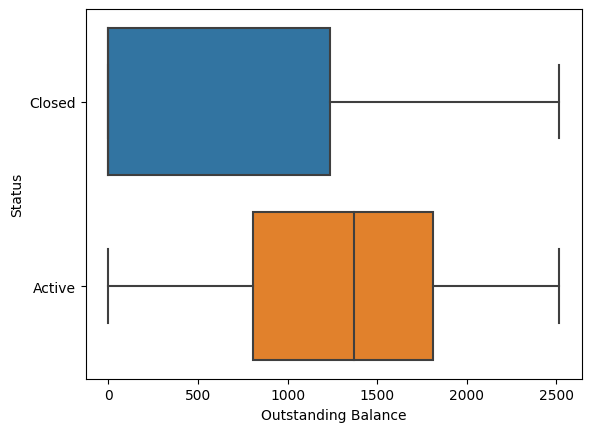

In [25]:
sns.boxplot(data=records, x='Outstanding Balance', y='Status')

<Axes: xlabel='Utilisation Ratio', ylabel='Status'>

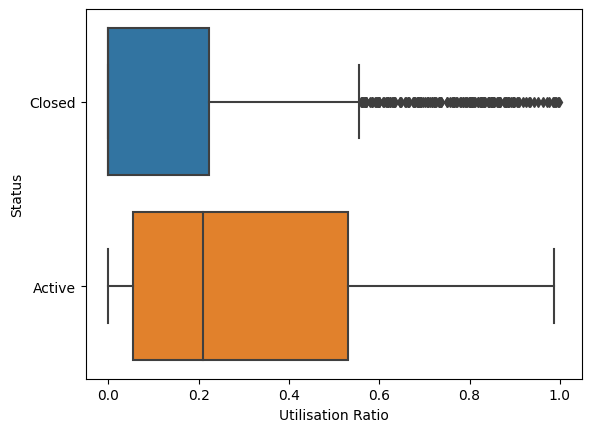

In [26]:
sns.boxplot(data=records, x='Utilisation Ratio', y='Status')

<Axes: xlabel='Total Amount of Transactions', ylabel='Status'>

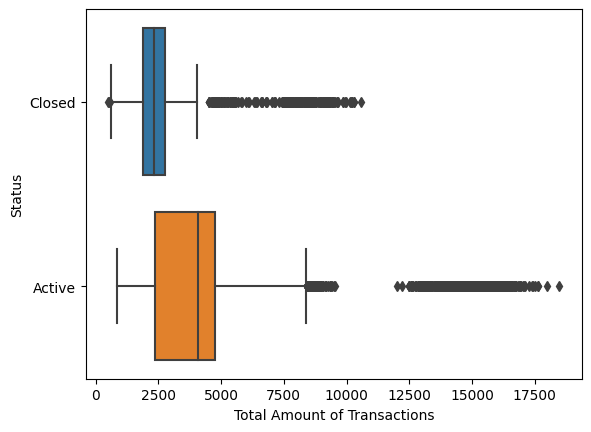

In [27]:
sns.boxplot(data=records, x='Total Amount of Transactions', y='Status')

<Axes: xlabel='Total Number of Transactions', ylabel='Status'>

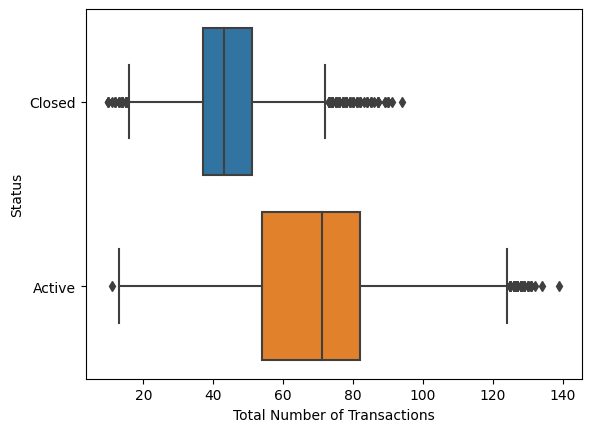

In [28]:
sns.boxplot(data=records, x='Total Number of Transactions', y='Status')

<Axes: xlabel='Months Inactive over 12 months', ylabel='Status'>

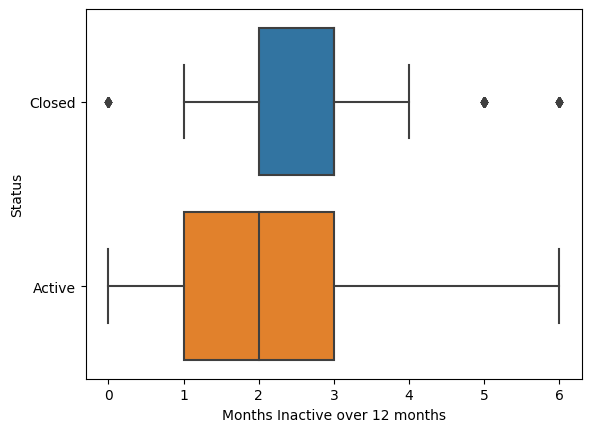

In [29]:
sns.boxplot(data=records, x='Months Inactive over 12 months', y='Status')

The average of outstanding balance, utilisation ratio, total amount of transactions and number of transactions, months inactive over 12 months of persons with closed accounts is substantially lower than that of those with active accounts, indicating how well these factors predict customers' status.

<Axes: xlabel='Number of Contacts over 12 months', ylabel='Status'>

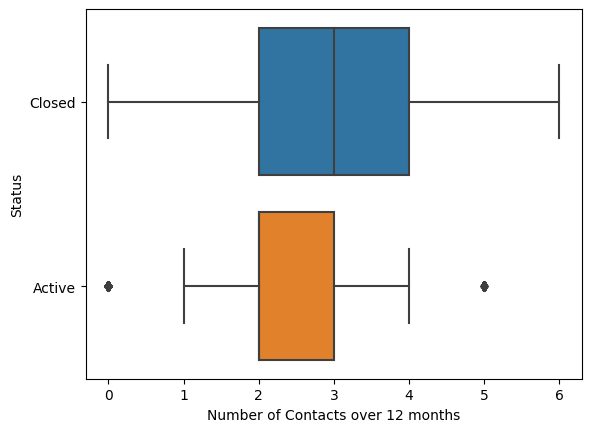

In [30]:
sns.boxplot(data=records, x='Number of Contacts over 12 months', y='Status')

<Axes: xlabel='Number of Contacts over 12 months', ylabel='count'>

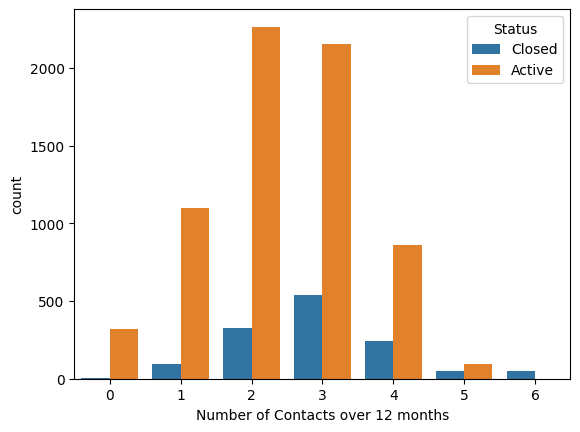

In [31]:
sns.countplot(data=records, x='Number of Contacts over 12 months', hue='Status')

Closed accounts contact the bank more than active accounts, which implies difficulties or complaints. The more consumers complain, the more likely they are to leave.

### 1.3 Data transformation

Annual income values are hierarchical, thus categorical data is translated to ordinal data and arranged in order of increasing quantity.

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
AnnualIncome_order = { 'Less than $50K':0, '$50K - $70K':1, '$70K - $90K':2, '$90K - $110K':3, '$110K and Over':4}

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
records['Annual Income'] = encoder.fit_transform(records['Annual Income']. map(AnnualIncome_order))

Account type values are also hierarchical, with more premium cards/account types having more favourable principal, interest, and cash advance terms. VSNeobank's account types are assumed to be in the following order: silver, gold, diamond, titanium.

In [35]:
AccountType_order = {'Silver':0, 'Gold':1, 'Diamond':2, 'Titanium':3}
records['Account Type'] = encoder.fit_transform(records['Account Type']. map(AccountType_order))

In [36]:
records['Account Type'].value_counts()

0    7551
1     437
2      94
3      19
Name: Account Type, dtype: int64

Since unknown marital status is likely to have a positive link with status, and there is a distinct pattern- larger percentage in closed accounts- which may suggest a pattern of customers to be a good predictor to estimate customers' status. Unknown material values are preserved and transformed by dummy variables.

In [37]:
cat_columns= ['Sex', 'Marital Status']
records=pd.get_dummies(records, columns=cat_columns, drop_first=True)
print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         8101 non-null   int64  
 1   Age                                8101 non-null   int64  
 2   Number of Dependants               8101 non-null   int64  
 3   Annual Income                      8101 non-null   int64  
 4   Account Type                       8101 non-null   int64  
 5   Credit Limit                       8101 non-null   float64
 6   Number of Accounts                 8101 non-null   int64  
 7   Months since Openning              8101 non-null   int64  
 8   Outstanding Balance                8101 non-null   int64  
 9   Utilisation Ratio                  8101 non-null   float64
 10  Total Amount of Transactions       8101 non-null   int64  
 11  Total Number of Transactions       8101 non-null   int64

In [38]:
records['Status'] = records['Status'].apply(lambda x: 1 if x == 'Closed' else 0)

In [39]:
# Drop irrelevant variables
records.drop(['CustomerID'], axis=1, inplace=True)

In [40]:
records.head(10)

,Age,Number of Dependants,Annual Income,Account Type,Credit Limit,Number of Accounts,Months since Openning,Outstanding Balance,Utilisation Ratio,Total Amount of Transactions,Total Number of Transactions,Number of Contacts over 12 months,Months Inactive over 12 months,Status,Sex_M,Marital Status_Married,Marital Status_Single,Marital Status_Unknown
0,51,2,2,0,4123.0,5,46,1760,0.427,2447,40,2,3,1,1,1,0,0
1,46,3,3,0,19458.0,4,40,1435,0.074,1217,27,3,3,0,1,1,0,0
2,49,1,1,0,1438.3,4,41,522,0.363,2030,37,3,3,1,0,1,0,0
3,54,3,3,1,34516.0,2,36,761,0.022,8444,68,1,3,1,1,1,0,0
4,47,2,3,0,34516.0,3,36,1264,0.037,7827,77,2,2,0,1,0,1,0
5,46,1,0,0,2532.0,4,37,1487,0.587,4143,71,2,2,0,0,1,0,0
6,45,2,0,0,8103.0,2,36,0,0.000,5221,82,3,1,0,0,1,0,0
7,41,3,4,1,34516.0,3,36,1453,0.042,4147,76,2,3,0,1,1,0,0
8,57,3,0,0,2515.0,5,47,1922,0.764,2231,58,3,3,0,0,1,0,0
9,48,2,0,0,3745.0,3,37,1291,0.345,4956,88,2,4,0,0,0,0,0


<Axes: >

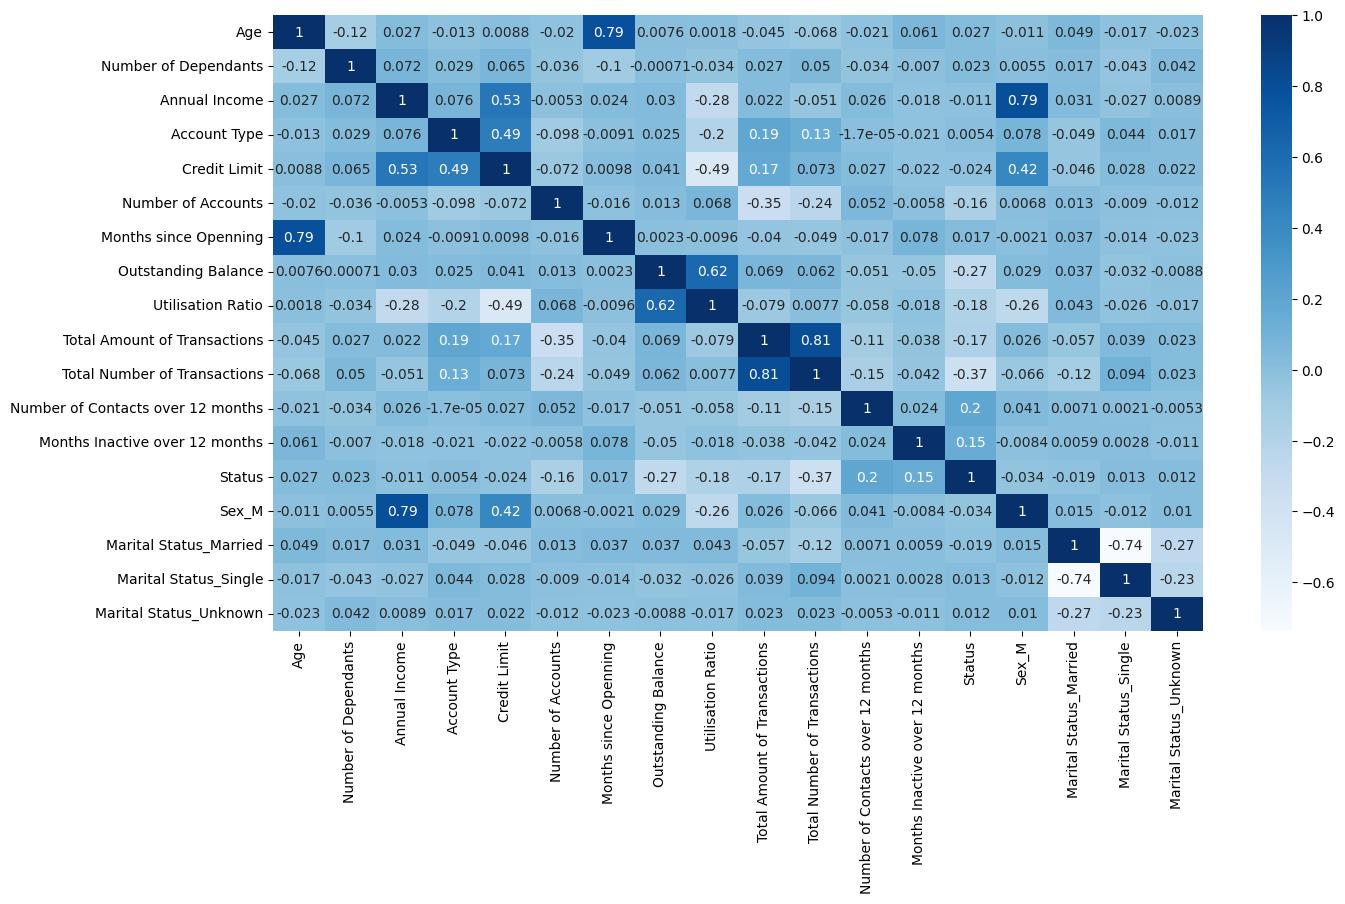

In [57]:
# Create heat map to check correlation
plt.figure(figsize = (15,8))
sns.heatmap(data=records.corr(), cmap="Blues", annot=True)

The heat map shows a high correlation between age and months since opening (0.79), whereas the correlation between age and status (0.027) is larger than the correlation between months since opening and status (0.017), indicating that months since opening should be deleted.

Similarly, total number of transactions and total amount of transactions have a high correlation rate (0.81), but total number of transactions has a higher absolute correlation rate (0.37) with status than total amount of transactions (0.17), suggesting that total amount of transactions should be removed.

Although Sex_M and yearly income have a high correlation rate (0.79), Sex_M has a greater absolute correlation rate (0.034) with status than annual income (0.01), hence annual income may be omitted.

Furthermore, since utilization rate is computed from outstanding balance and credit limit, this variable could be removed.

To select attributes, we drop the multi-collinearlily attributes having lowest correlation rate with the lowest correlation rate to status (based on above analysis) and continue the process until the model’s performance is worsened significantly.

In [63]:
X=records.drop('Status', axis=1)
y=records['Status']


In [64]:
#import scaler
from sklearn.preprocessing import StandardScaler
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_norm=scaler.fit_transform(X)

In [65]:
#PCA application to project data to a lower dimensional space (2)
from sklearn.decomposition import PCA
n=2
pca = PCA(n_components = n)
X_norm_pca= pca.fit_transform(X_norm)

## 2. Clustering using K-Means

By group data points with similar characteristics into k groups (clusters), VSNeoBank could identify  different customers group to create different approach to those.

Firstly, the test is conducted with 3 target customers segmentation.

In [66]:
# Model building

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k=3
kmeans = KMeans(n_clusters=k, n_init='auto',max_iter=300, random_state=2023)
kmeans.fit(X_norm_pca)

# Add cluster labels to original dataset
records['Cluster'] = kmeans.labels_

#### 2.1 EDA with clusters

In [67]:
records['Cluster'].value_counts()

1    4358
2    2622
0    1121
Name: Cluster, dtype: int64

In [68]:
#visualise clusters with PCA components = 2
import plotly.express as px
from sklearn.decomposition import PCA
fig = px.scatter(X_norm_pca, x= 0 , y= 1, color = records['Cluster'],
                 labels={'0': 'PC 1', '1': 'PC 2'} )
fig.show()


To able to visualise the data in the form which are understandable by human, dimensionality reduction into 2 dimension is applied by PCA.

The visualisation depicted moderately distinguished clusters.

#### 2.2 Performance Evaluation

###### Within-Cluster Sum of Squares


In [70]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

Within-Cluster Sum of Squares (WCSS): 13839.252


##### Silhouette score

In [71]:
# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_norm_pca, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Silhouette score: 0.506


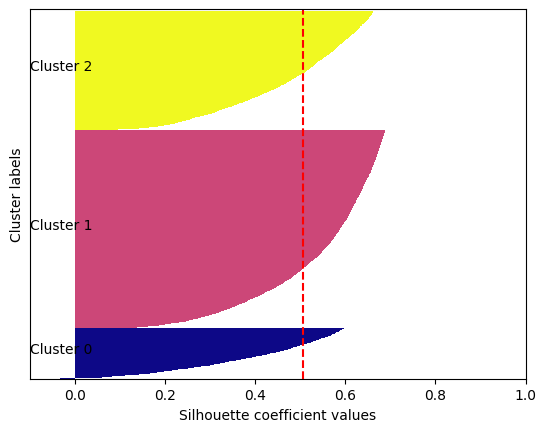

In [72]:
#Import funtions to visualise silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.cm as cm

cluster_labels = kmeans.fit_predict(X_norm_pca)

# Compute silhouette scores
silhouette_avg = silhouette_score(X_norm_pca, cluster_labels)
sample_silhouette_values = silhouette_samples(X_norm_pca, cluster_labels)

# Plot silhouette diagram
n_clusters = 3
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.plasma

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_norm_pca) + (n_clusters + 1) * 10])

plt.show()

Clusters 1 has the most quantity, then cluster 2 and cluster 0 has the least customers.

### 2.3 Optimise K


This task is to identity how many clusters VSNeoBank should divide their customers into.

#### Use the elbow method based on the SSE score

The number of clusters are limted from 1 to 41, because VSNeoBanks are supposed to classify their customers into 2 groups at least and maximium is 40 groups.

In [79]:
# Determine optimal number of clusters using the SSE metric
sse_scores = []
best_k=3
best_sse_score=13839.252
for k in range(1, 41):
  kmeans = KMeans(n_clusters=k, n_init=2)
  kmeans.fit(X_norm_pca)
  sse_score_k=kmeans.inertia_
  sse_scores.append(sse_score_k)
  if best_sse_score > sse_score_k:
    best_k = k
    best_sse_score = sse_score_k

print('Best k: ', best_k)
print('Best within cluster sum of squarred error score: ', '%.3f' %best_sse_score)

Best k:  40
Best within cluster sum of squarred error score:  1199.325


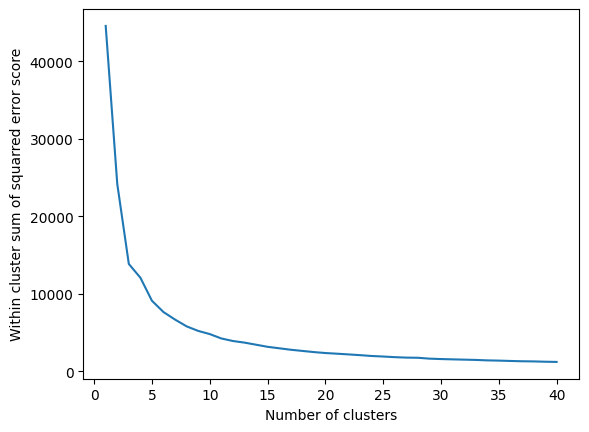

In [80]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(1,41), sse_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squarred error score")
plt.show()

If optimisation based on the sum of the squared Euclidean distances of each point to its closest centroid, k is 40. However, to target to 40 different groups of customers which are huge, high cost required, too complicated to create 40 diffrenet approachs, projects and marketing campaigns.

#### Use the elbow method based on the silhouette score

In [75]:
# Determine optimal number of clusters using silhouette score
sil_scores = []
best_k=3
best_sil_score=13839.252
for k in range(1, 41):
  kmeans = KMeans(n_clusters=k, n_init=2)
  kmeans.fit(X_norm_pca)
  sil_score_k=silhouette_score(X_norm_pca, kmeans.labels_)
  sil_scores.append(sil_score_k)
  if best_sil_score < sil_score_k:
    best_k = k
    best_sil_score = sil_score_k

print('Best k: ', best_k)
print('Best silhouette score: ', '%.3f' %best_sil_score)

Best k:  3
Best silhouette score:  0.506


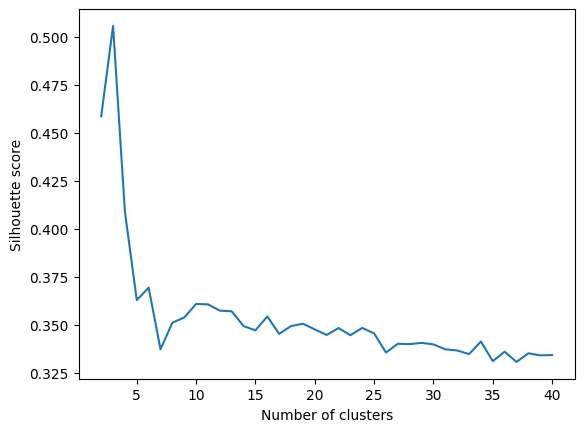

In [76]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sil_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

If the optimisation based on Silhouette score, k=3 will lead to the best performance when the score is 0.506, the data points within a cluster are the most similar to each other, and the most different from the data points in other clusters.

<a id = "cell_modeling"></a>
## 3. Machine learning model development
**Summary:** KNN and Decision trees are employed to predict the classification, they are optimized with changes in hyperparameter and cross validation and ensemble enablers implementation.

## 3.1 KNN Classifier

### 3.1.1 KNN Classifier Model building

In [63]:
from sklearn.neighbors import KNeighborsClassifier #Import KNN classifier class
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#import scaler
from sklearn.preprocessing import StandardScaler

In [64]:
records.describe()

,Age,Number of Dependants,Annual Income,Account Type,Credit Limit,Number of Accounts,Months since Openning,Outstanding Balance,Utilisation Ratio,Total Amount of Transactions,Total Number of Transactions,Number of Contacts over 12 months,Months Inactive over 12 months,Status,Sex_M,Marital Status_Married,Marital Status_Single,Marital Status_Unknown
count,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000
mean,46.273176,2.355512,1.205283,0.084187,8686.277768,3.818417,35.874830,1163.520553,0.274287,4397.203308,64.877916,2.453154,2.334033,0.160721,0.475003,0.461178,0.388347,0.075917
std,7.981850,1.296535,1.349697,0.338221,9095.531430,1.561729,7.968666,815.008448,0.276103,3390.907493,23.398471,1.109748,1.008734,0.367296,0.499406,0.498521,0.487404,0.264881
min,26.000000,0.000000,0.000000,0.000000,1438.300000,1.000000,13.000000,0.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,0.000000,0.000000,2570.000000,3.000000,31.000000,350.000000,0.022000,2148.000000,45.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,2.000000,1.000000,0.000000,4592.000000,4.000000,36.000000,1282.000000,0.174000,3896.000000,67.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,3.000000,2.000000,0.000000,11236.000000,5.000000,40.000000,1784.000000,0.504000,4739.000000,81.000000,3.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,68.000000,5.000000,4.000000,3.000000,34516.000000,6.000000,56.000000,2517.000000,0.999000,18484.000000,139.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


KNN is applied for 5 set of X (different combinations of attributes) including combination with all attributes (Combination X) , All attributes except annual income (Combination X_income), All attributes except annual income, months since opening (Combination X_month), All attributes except annual income, months since opening, total amount of transactions (Combination X_amount), All attributes except annual income, months since opening, utilization ratio (Combination X_ratio) to select the most important predictors.

In [ ]:
X_income=records.drop(columns = ['Status','Annual Income'])
y_income=records['Status']

In [ ]:
X_month=records.drop(columns = ['Status','Annual Income', 'Months since Openning'])
y_month=records['Status']

In [ ]:
X_amount=records.drop(columns = ['Status','Annual Income', 'Months since Openning', 'Total Amount of Transactions'])
y_amount=records['Status']

In [ ]:
X_ratio=records.drop(columns = ['Status','Annual Income', 'Months since Openning', 'Utilisation Ratio'])
y_ratio=records['Status']

In [65]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=2023 )
X_train_income, X_test_income, y_train_income, y_test_income = train_test_split(X_income, y_income, test_size=0.3, stratify = y_income, random_state=2023 )
X_train_month, X_test_month, y_train_month, y_test_month = train_test_split(X_month, y_month, test_size=0.3, stratify = y_month, random_state=2023 )
X_train_amount, X_test_amount, y_train_amount, y_test_amount = train_test_split(X_amount, y_amount, test_size=0.3, stratify = y_amount, random_state=2023 )
X_train_ratio, X_test_ratio, y_train_ratio, y_test_ratio = train_test_split(X_ratio, y_ratio, test_size=0.3, stratify = y_ratio, random_state=2023 )

In [66]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.fit_transform(X_test)

In [67]:
X_train_norm_income=scaler.fit_transform(X_train_income)
X_test_norm_income=scaler.fit_transform(X_test_income)

In [68]:
X_train_norm_month=scaler.fit_transform(X_train_month)
X_test_norm_month=scaler.fit_transform(X_test_month)

In [69]:
X_train_norm_amount=scaler.fit_transform(X_train_amount)
X_test_norm_amount=scaler.fit_transform(X_test_amount)

In [70]:
X_train_norm_ratio=scaler.fit_transform(X_train_ratio)
X_test_norm_ratio=scaler.fit_transform(X_test_ratio)

In [71]:
# Train a KNN model
k = 20 # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_norm, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test_norm)


In [72]:
knn.fit(X_train_norm_income, y_train_income)
y_pred_income = knn.predict(X_test_norm_income)


In [73]:
knn.fit(X_train_norm_month, y_train_month)
y_pred_month = knn.predict(X_test_norm_month)

In [74]:
knn.fit(X_train_norm_amount, y_train_amount)
y_pred_amount = knn.predict(X_test_norm_amount)

In [75]:
knn.fit(X_train_norm_ratio, y_train_ratio)
y_pred_ratio = knn.predict(X_test_norm_ratio)

<a id = "cell_Evaluation"></a>
### 3.1.2 KNN model Evaluation

In [76]:
# Print the classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2011   29]
 [ 241  150]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2040
           1       0.84      0.38      0.53       391

    accuracy                           0.89      2431
   macro avg       0.87      0.68      0.73      2431
weighted avg       0.88      0.89      0.87      2431



In [77]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))

Accuracy:  0.8889345948169478
Precision:  0.8379888268156425
Recall:  0.3836317135549872
F1:  0.5263157894736842


In [78]:
print("Accuracy: ", metrics.accuracy_score(y_test_income,y_pred_income))
print("Precision: ", metrics.precision_score(y_test_income,y_pred_income))
print("Recall: ", metrics.recall_score(y_test_income,y_pred_income))
print("F1: ", metrics.f1_score(y_test_income,y_pred_income))

Accuracy:  0.8889345948169478
Precision:  0.8342541436464088
Recall:  0.38618925831202044
F1:  0.527972027972028


In [79]:
print("Accuracy: ", metrics.accuracy_score(y_test_month,y_pred_month))
print("Precision: ", metrics.precision_score(y_test_month,y_pred_month))
print("Recall: ", metrics.recall_score(y_test_month,y_pred_month))
print("F1: ", metrics.f1_score(y_test_month,y_pred_month))

Accuracy:  0.8914027149321267
Precision:  0.8432432432432433
Recall:  0.3989769820971867
F1:  0.5416666666666666


In [80]:
print("Accuracy: ", metrics.accuracy_score(y_test_amount,y_pred_amount))
print("Precision: ", metrics.precision_score(y_test_amount,y_pred_amount))
print("Recall: ", metrics.recall_score(y_test_amount,y_pred_amount))
print("F1: ", metrics.f1_score(y_test_amount,y_pred_amount))

Accuracy:  0.8905800082270671
Precision:  0.8306878306878307
Recall:  0.40153452685422
F1:  0.5413793103448276


In [81]:
print("Accuracy: ", metrics.accuracy_score(y_test_ratio,y_pred_ratio))
print("Precision: ", metrics.precision_score(y_test_ratio,y_pred_ratio))
print("Recall: ", metrics.recall_score(y_test_ratio,y_pred_ratio))
print("F1: ", metrics.f1_score(y_test_ratio,y_pred_ratio))

Accuracy:  0.8934594816947758
Precision:  0.84375
Recall:  0.4143222506393862
F1:  0.5557461406518011


All attributes except annual income, months since opening, utilization ratio (Combination X_ratio) to select the most important predictors.

<a id = "cell_Comparison"></a>
### 3.1.3 Optimising k  

Best k value: 9
Best accuracy: 0.907


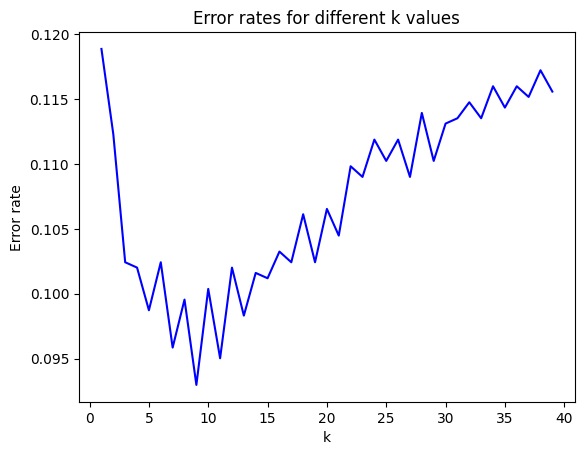

In [82]:
# Define a list of k values to test
k_values = list(range(1, 40))

# Train and evaluate KNN classifiers with different k values

best_k=0
best_accuracy=0
accuracy_scores = []
accuracy = 0
error_rate=1-accuracy
error_rates=[]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_norm_ratio, y_train_ratio)
    accuracy = knn.score(X_test_norm_ratio, y_test_ratio)
    accuracy_scores.append(accuracy)
    error_rates.append(1-accuracy)
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

# Find the best k value with highest accuracy score
#best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.3f}")

# Plot k values against accuracy scores
#plt.plot(k_values, accuracy_scores, color='red')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.title('Error rates for different k values')
plt.plot(k_values, error_rates, color='blue')
plt.show()

In [83]:
# Train a KNN model with best k
k = 9 # Number of neighbors
knn_bestk = KNeighborsClassifier(n_neighbors=k)
knn_bestk.fit(X_train_norm_ratio, y_train_ratio)

# Make predictions on the testing set
y_pred_bestk_ratio = knn_bestk.predict(X_test_norm_ratio)

In [84]:
print(confusion_matrix(y_test_ratio, y_pred_bestk_ratio))

[[1994   46]
 [ 180  211]]


In [85]:
print("Accuracy: ", metrics.accuracy_score(y_test_ratio,y_pred_bestk_ratio))
print("Precision: ", metrics.precision_score(y_test_ratio,y_pred_bestk_ratio))
print("Recall: ", metrics.recall_score(y_test_ratio,y_pred_bestk_ratio))
print("F1: ", metrics.f1_score(y_test_ratio,y_pred_bestk_ratio))

Accuracy:  0.90703414232826
Precision:  0.8210116731517509
Recall:  0.5396419437340153
F1:  0.6512345679012346


After removing Annual Income, months since opening and ultilisation ratio attributes, the model have the best performance when k=9


In [86]:
#get predicted probabilities for the main class
y_pred_probs_bestk = knn_bestk.predict_proba(X_test_norm_ratio)
y_pred_probs_bestk = y_pred_probs_bestk[:, 1]
print(y_pred_probs_bestk)

[0.22222222 0.         0.22222222 ... 0.         0.11111111 0.        ]


ValueError: ignored

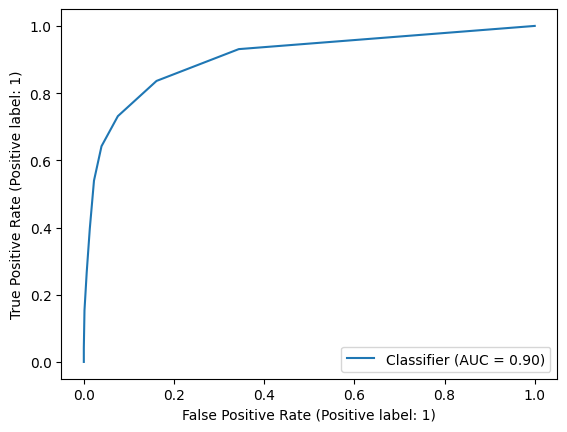

In [88]:
RocCurveDisplay.from_predictions(y_test_ratio, y_pred_probs_bestk)
ConfusionMatrixDisplay.from_predictions(y_test_ratio, y_pred_probs_bestk)
plt.show()

**Find the best threshold**

AUC: 0.905


<Axes: >

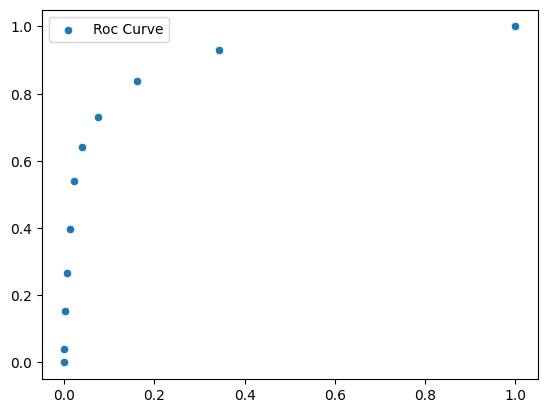

In [89]:
#get fpr, tpr, thredholds and AUC
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test_ratio, y_pred_probs_bestk)
print('AUC:', '%.3f' % metrics.auc(fpr, tpr))
sns.scatterplot(x=fpr, y=tpr, label='Roc Curve')

In [91]:
#from sklearn.metrics import accuracy_score
# Find the best threshold based on accuracy
accuracy = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_bestk]
    accuracy.append(accuracy_score(y_test_ratio, y_pred_t))
best_threshold = thresholds[accuracy.index(max(accuracy))]

print(best_threshold)

# print the best threshold and the highest AUC score on the test data
print(best_threshold)

0.4444444444444444
0.4444444444444444


In [92]:
from sklearn.metrics import f1_score
# Find the best threshold based on F1 score
f1 = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_bestk]
    f1.append(f1_score(y_test_ratio, y_pred_t))
best_thresholdf1 = thresholds[f1.index(max(f1))]

print(best_thresholdf1)

0.4444444444444444


In [93]:
#get predicted probabilities for the main class
y_pred_best = (knn_bestk.predict_proba(X_test_norm_ratio)[:,1] >= best_threshold).astype(bool)

In [94]:
y_pred_bestf1 = (knn_bestk.predict_proba(X_test_norm_ratio)[:,1] >= best_thresholdf1).astype(bool)

In [95]:
print(confusion_matrix(y_test_ratio, y_pred_best))
print(classification_report(y_test_ratio, y_pred_best))

[[1960   80]
 [ 140  251]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2040
           1       0.76      0.64      0.70       391

    accuracy                           0.91      2431
   macro avg       0.85      0.80      0.82      2431
weighted avg       0.91      0.91      0.91      2431



In [96]:
print("Accuracy: ", metrics.accuracy_score(y_test_ratio,y_pred_best))
print("Precision: ", metrics.precision_score(y_test_ratio,y_pred_best))
print("Recall: ", metrics.recall_score(y_test_ratio,y_pred_best))
print("F1: ", metrics.f1_score(y_test_ratio,y_pred_best))

Accuracy:  0.9095022624434389
Precision:  0.7583081570996979
Recall:  0.6419437340153452
F1:  0.6952908587257618


Best chosen thresthold is 0.44

<a id = "cell_Comparison"></a>
### 3.1.4 Cross Validation

Cross validation with k=10 is applied to validate the KNN by doing the process 10 times to reduce the bias in the prediction

In [97]:
#Import cross validation function
from sklearn.model_selection import cross_val_score
#import leave one out
from sklearn.model_selection import LeaveOneOut
#import LeavePOut
from sklearn.model_selection import LeavePOut

In [98]:
# Calculate the 95% confidence interval of the mean F1 score
def get_95ci(metric):
  n = len(metric)
  se = metric.std() / np.sqrt(n)
  t=2.262  # t-value for 95% CI and n-1 degrees of freedom, 10 folders
  ci = t * se
  return ci

In [99]:
# Perform 10-fold cross-validation
accuracy= cross_val_score(knn_bestk, X_ratio, y_ratio, cv=10)
f1 = cross_val_score(knn_bestk, X_ratio, y_ratio, cv=10, scoring=('f1'))
# Print the mean accuracy scores and 95%CI of the scores
print("Accuracy scores: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))
# Print the mean F1 scores and 95%CI of the scores
print("F1 scores: %0.3f (+/- %0.3f)" % (f1.mean(), get_95ci(f1)))

Accuracy scores: 0.896 (+/- 0.005)
F1 scores: 0.637 (+/- 0.021)


<a id = "cell_Comparison"></a>
### 3.1.4 Ensemble learner

Ensemble learner (Bootstrap) is applied to improve the performance of model

#### Bootstrap Aggregation

In [100]:
#Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

In [101]:
knn_bestk = KNeighborsClassifier(n_neighbors=7)
# Define the ensemble classifier using bagging
ensemble_classifier = BaggingClassifier(estimator=knn_bestk, n_estimators=100, random_state=2023)

In [102]:
# Train the ensemble classifier on the training data
ensemble_classifier.fit(X_train_norm_ratio, y_train_ratio)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=7),
                  n_estimators=100, random_state=2023)

In [103]:
# Make predictions on the testing data
y_pred_boostrap = ensemble_classifier.predict(X_test_norm_ratio)

In [104]:
print(confusion_matrix(y_test_ratio, y_pred_boostrap))
print(classification_report(y_test_ratio, y_pred_boostrap))

[[1990   50]
 [ 178  213]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2040
           1       0.81      0.54      0.65       391

    accuracy                           0.91      2431
   macro avg       0.86      0.76      0.80      2431
weighted avg       0.90      0.91      0.90      2431



In [105]:
print('knn after boostrap  : ')
print("Accuracy: ", metrics.accuracy_score(y_test_ratio,y_pred_boostrap))
print("Precision: ", metrics.precision_score(y_test_ratio,y_pred_boostrap))
print("Recall: ", metrics.recall_score(y_test_ratio,y_pred_boostrap))
print("F1: ", metrics.f1_score(y_test_ratio,y_pred_boostrap))

knn after boostrap  : 
Accuracy:  0.9062114356232003
Precision:  0.8098859315589354
Recall:  0.5447570332480819
F1:  0.6513761467889909


##3.2 Decision Tree Classifier

###3.2.1 Decision Tree Model buidling

In [106]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [107]:
from sklearn.tree import plot_tree

#### Base DT

In [108]:
# Create Decision Tree classifer object
base_clf = DecisionTreeClassifier(random_state=2023)
# Train Decision Tree Classifer
base_clf = base_clf.fit(X_train_norm, y_train)
#Predict the response for test dataset
y_pred_ontest = base_clf.predict(X_test_norm)

In [109]:
print(confusion_matrix(y_test, y_pred_ontest))
print(classification_report(y_test, y_pred_ontest))

[[1952   88]
 [  86  305]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2040
           1       0.78      0.78      0.78       391

    accuracy                           0.93      2431
   macro avg       0.87      0.87      0.87      2431
weighted avg       0.93      0.93      0.93      2431



In [110]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred_ontest))
print("Precision: ", metrics.precision_score(y_test,y_pred_ontest))
print("Recall: ", metrics.recall_score(y_test,y_pred_ontest))
print("F1: ", metrics.f1_score(y_test,y_pred_ontest))

Accuracy:  0.9284245166598107
Precision:  0.7760814249363868
Recall:  0.7800511508951407
F1:  0.7780612244897959


In [111]:
print(confusion_matrix(y_test, y_pred_ontest))

[[1952   88]
 [  86  305]]


Decision tree is applied for 5 set of X (different combinations of attributes) including combination with all attributes (Combination X) , All attributes except annual income (Combination X_income), All attributes except months since opening (Combination X_rmmonth), All attributes except months since opening, total amount of transactions (Combination X_rmamount), All attributes except months since opening, utilization ratio (Combination X_rmratio) to select the most important predictors.

In [112]:
# Train Combination X_income in DT
base_clf = base_clf.fit(X_train_norm_income, y_train_income)
y_pred_ontest_income = base_clf.predict(X_test_norm_income)

In [113]:
print("Accuracy: ", metrics.accuracy_score(y_test_income,y_pred_ontest_income))
print("Precision: ", metrics.precision_score(y_test_income,y_pred_ontest_income))
print("Recall: ", metrics.recall_score(y_test_income,y_pred_ontest_income))
print("F1: ", metrics.f1_score(y_test_income,y_pred_ontest_income))

Accuracy:  0.9230769230769231
Precision:  0.7698412698412699
Recall:  0.7442455242966752
F1:  0.7568270481144345


In [114]:
# Train Combination X_rmmonth in DT
X_rmmonth=records.drop(columns = ['Status', 'Months since Openning'])
y_rmmonth=records['Status']

X_train_rmmonth, X_test_rmmonth, y_train_rmmonth, y_test_rmmonth = train_test_split(X_rmmonth, y_rmmonth, test_size=0.3, stratify = y_rmmonth, random_state=2023 )

X_train_norm_rmmonth=scaler.fit_transform(X_train_rmmonth)
X_test_norm_rmmonth=scaler.fit_transform(X_test_rmmonth)

base_clf = base_clf.fit(X_train_norm_rmmonth, y_train_rmmonth)
y_pred_ontest_rmmonth = base_clf.predict(X_test_norm_rmmonth)

In [115]:
print("Accuracy: ", metrics.accuracy_score(y_test_rmmonth,y_pred_ontest_rmmonth))
print("Precision: ", metrics.precision_score(y_test_rmmonth,y_pred_ontest_rmmonth))
print("Recall: ", metrics.recall_score(y_test_rmmonth,y_pred_ontest_rmmonth))
print("F1: ", metrics.f1_score(y_test_rmmonth,y_pred_ontest_rmmonth))

Accuracy:  0.9292472233648704
Precision:  0.773067331670823
Recall:  0.7928388746803069
F1:  0.7828282828282828


In [116]:
## Train Combination X_rmamount in DT
X_rmamount=records.drop(columns = ['Status', 'Months since Openning', 'Total Amount of Transactions'])
y_rmamount=records['Status']

X_train_rmamount, X_test_rmamount, y_train_rmamount, y_test_rmamount = train_test_split(X_rmamount, y_rmamount, test_size=0.3, stratify = y_rmamount, random_state=2023 )

X_train_norm_rmamount=scaler.fit_transform(X_train_rmamount)
X_test_norm_rmamount=scaler.fit_transform(X_test_rmamount)

base_clf = base_clf.fit(X_train_norm_rmamount, y_train_rmamount)
y_pred_ontest_rmamount = base_clf.predict(X_test_norm_rmamount)

In [117]:
print("Accuracy: ", metrics.accuracy_score(y_test_rmamount,y_pred_ontest_rmamount))
print("Precision: ", metrics.precision_score(y_test_rmamount,y_pred_ontest_rmamount))
print("Recall: ", metrics.recall_score(y_test_rmamount,y_pred_ontest_rmamount))
print("F1: ", metrics.f1_score(y_test_rmamount,y_pred_ontest_rmamount))

Accuracy:  0.881530234471411
Precision:  0.6178489702517163
Recall:  0.690537084398977
F1:  0.6521739130434783


In [118]:
# Train Combination X_rmratio in DT
X_rmratio=records.drop(columns = ['Status', 'Months since Openning', 'Utilisation Ratio'])
y_rmratio=records['Status']

X_train_rmratio, X_test_rmratio, y_train_rmratio, y_test_rmratio = train_test_split(X_rmratio, y_rmratio, test_size=0.3, stratify = y_rmratio, random_state=2023 )

X_train_norm_rmratio=scaler.fit_transform(X_train_rmratio)
X_test_norm_rmratio=scaler.fit_transform(X_test_rmratio)

base_clf = base_clf.fit(X_train_norm_rmratio, y_train_rmratio)
y_pred_ontest_rmratio = base_clf.predict(X_test_norm_rmratio)

In [119]:
print('DT without prunning: ')
print("Accuracy: ", metrics.accuracy_score(y_test_rmratio,y_pred_ontest_rmratio))
print("Precision: ", metrics.precision_score(y_test_rmratio,y_pred_ontest_rmratio))
print("Recall: ", metrics.recall_score(y_test_rmratio,y_pred_ontest_rmratio))
print("F1: ", metrics.f1_score(y_test_rmratio,y_pred_ontest_rmratio))

DT without prunning: 
Accuracy:  0.9296585767174003
Precision:  0.7849740932642487
Recall:  0.7749360613810742
F1:  0.77992277992278


In [120]:
print(confusion_matrix(y_test_rmratio, y_pred_ontest_rmratio))

[[1957   83]
 [  88  303]]


After removing annual income and amount of transactions individually, the performance of model decreases, however, removal of months since opening and ulilization ratio has improved the model performance.

Important remaining attributes are age, number of dependants, account type, credit limit, number of accounts, outstanding balance, total amount of transactions, total number of transactions, number of contacts over 12 months, months inactive over 12 months, sex, marital status, annual income and amount of transactions.

#### Pre Prune DT

Tree growth is restricted before or during the growing to eliminate overfitting.

In [121]:
# Create Decision Tree classifer object
pre_pruned_clf = DecisionTreeClassifier(max_depth=6, criterion="entropy", max_leaf_nodes=10, random_state=2023)

# Train Decision Tree Classifer
pre_pruned_clf = pre_pruned_clf.fit(X_train_norm_rmratio, y_train_rmratio)

#Predict the response for test dataset
y_pred_train_pruned = pre_pruned_clf.predict(X_train_norm_rmratio)

#Predict the response for test dataset
y_pred_pre_pruned = pre_pruned_clf.predict(X_test_norm_rmratio)

In [122]:
print('Test performance of a pre_pruned decision tree after removing unimportant attributes: \n')
print(confusion_matrix(y_test_rmratio, y_pred_pre_pruned))
print(classification_report(y_test_rmratio, y_pred_pre_pruned))

Test performance of a pre_pruned decision tree after removing unimportant attributes: 

[[1980   60]
 [ 134  257]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2040
           1       0.81      0.66      0.73       391

    accuracy                           0.92      2431
   macro avg       0.87      0.81      0.84      2431
weighted avg       0.92      0.92      0.92      2431



In [123]:
print('DT after removing unimportant attributes pre-prunning: ')
print("Accuracy: ", metrics.accuracy_score(y_test_rmratio, y_pred_pre_pruned))
print("Precision: ", metrics.precision_score(y_test_rmratio, y_pred_pre_pruned))
print("Recall: ", metrics.recall_score(y_test_rmratio, y_pred_pre_pruned))
print("F1: ", metrics.f1_score(y_test_rmratio, y_pred_pre_pruned))

DT after removing unimportant attributes pre-prunning: 
Accuracy:  0.9201974496092143
Precision:  0.8107255520504731
Recall:  0.6572890025575447
F1:  0.7259887005649717


In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
# Define parameter grid for grid search
param_grid = {'max_depth': range(1, 21),
              'max_leaf_nodes': range(5, 20)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=2023) , param_grid, cv=5)
grid_search.fit(X_train_norm_rmratio, y_train_rmratio)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2023),
             param_grid={'max_depth': range(1, 21),
                         'max_leaf_nodes': range(5, 20)})

In [126]:
# Select best decision tree classifier based on grid search results
pre_pruned_clf = grid_search.best_estimator_

# Make predictions on training data using the best decision tree classifier
y_pred_train_pre_pruned = pre_pruned_clf.predict(X_train_norm_rmratio)

# Make predictions on testing data using the best decision tree classifier
y_pred_pre_pruned = pre_pruned_clf.predict(X_test_norm_rmratio)

In [127]:
#print confusion matrix for the pre-pruned DT on the training data
print('Training performance of a pre_pruned decision tree: \n')
print(confusion_matrix(y_train_rmratio, y_pred_train_pre_pruned))
print(classification_report(y_train_rmratio, y_pred_train_pre_pruned))

Training performance of a pre_pruned decision tree: 

[[4652  107]
 [ 222  689]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4759
           1       0.87      0.76      0.81       911

    accuracy                           0.94      5670
   macro avg       0.91      0.87      0.89      5670
weighted avg       0.94      0.94      0.94      5670



In [128]:
#print confusion matrix for a pre-pruned DT on the test data
print('Test performance of a pre_pruned decision tree: \n')
print(confusion_matrix(y_test_rmratio, y_pred_pre_pruned))
print(classification_report(y_test_rmratio, y_pred_pre_pruned))

Test performance of a pre_pruned decision tree: 

[[1989   51]
 [ 110  281]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2040
           1       0.85      0.72      0.78       391

    accuracy                           0.93      2431
   macro avg       0.90      0.85      0.87      2431
weighted avg       0.93      0.93      0.93      2431



In [129]:
print('Best DT pre-prunning based on grid: ')
print("Accuracy: ", metrics.accuracy_score(y_test_rmratio, y_pred_pre_pruned))
print("Precision: ", metrics.precision_score(y_test_rmratio, y_pred_pre_pruned))
print("Recall: ", metrics.recall_score(y_test_rmratio, y_pred_pre_pruned))
print("F1: ", metrics.f1_score(y_test_rmratio, y_pred_pre_pruned))

Best DT pre-prunning based on grid: 
Accuracy:  0.9337721102426985
Precision:  0.8463855421686747
Recall:  0.7186700767263428
F1:  0.7773167358229598


#### Post Prune DT

Restricting DT by allowing tree to grow then prune branches

In [130]:
# Post-prune the decision tree
path = base_clf.cost_complexity_pruning_path(X_train_norm_rmratio, y_train_rmratio)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]  # Remove the maximum alpha as it is only the tree with one node
decision_trees = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(criterion="entropy", random_state=2023, ccp_alpha=ccp_alpha)
    dt.fit(X_train_norm_rmratio, y_train_rmratio)
    decision_trees.append(dt)

# Find the decision tree with the highest accuracy on the validation data
accuracies = [accuracy_score(y_test_rmratio, dt.predict(X_test_norm_rmratio)) for dt in decision_trees]
post_pruned_clf = decision_trees[accuracies.index(max(accuracies))]

# Make predictions on the training data using the best decision tree
y_pred_train_post_pruned = post_pruned_clf.predict(X_train_norm_rmratio)

# Make predictions on the testing data using the best decision tree
y_pred_post_pruned = post_pruned_clf.predict(X_test_norm_rmratio)

In [131]:
# Compute impurities for max_depth and min_samples_leaf
max_depth_path = base_clf.cost_complexity_pruning_path(X_train_norm_rmratio, y_train_rmratio)
max_depth_impurity = max_depth_path['impurities']
min_samples_leaf_path = base_clf.cost_complexity_pruning_path(X_train_norm_rmratio, y_train_rmratio)
min_samples_leaf_impurity = min_samples_leaf_path['impurities']

ccp_alpha = 0.0000, train accuracy = 1.0000, test accuracy = 0.9288
ccp_alpha = 0.0001, train accuracy = 1.0000, test accuracy = 0.9288
ccp_alpha = 0.0001, train accuracy = 1.0000, test accuracy = 0.9288
ccp_alpha = 0.0001, train accuracy = 1.0000, test accuracy = 0.9288
ccp_alpha = 0.0002, train accuracy = 1.0000, test accuracy = 0.9288
ccp_alpha = 0.0002, train accuracy = 1.0000, test accuracy = 0.9288
ccp_alpha = 0.0002, train accuracy = 1.0000, test accuracy = 0.9288
ccp_alpha = 0.0002, train accuracy = 1.0000, test accuracy = 0.9288
ccp_alpha = 0.0002, train accuracy = 1.0000, test accuracy = 0.9288
ccp_alpha = 0.0002, train accuracy = 1.0000, test accuracy = 0.9288
ccp_alpha = 0.0002, train accuracy = 1.0000, test accuracy = 0.9288
ccp_alpha = 0.0002, train accuracy = 1.0000, test accuracy = 0.9288
ccp_alpha = 0.0002, train accuracy = 1.0000, test accuracy = 0.9288
ccp_alpha = 0.0002, train accuracy = 1.0000, test accuracy = 0.9288
ccp_alpha = 0.0002, train accuracy = 1.0000, tes

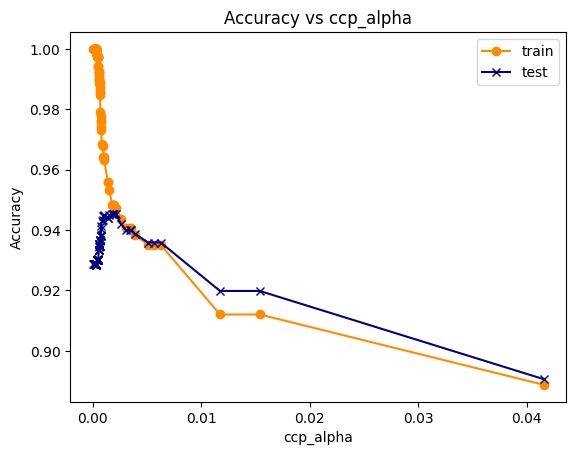

In [132]:
# Compute impurities for max_depth
#max_depth_impurity = base_clf.cost_complexity_pruning_path(X_train_norm_rmratio, y_train_rmratio)['impurities']

# Train decision tree classifiers using different ccp_alphas and impurities
#ccp_alphas = max_depth_impurity / max_depth_impurity[-1]  # normalize impurities
train_acc = []
test_acc = []
clfs=[]
for ccp_alpha in ccp_alphas:
    base_clf = DecisionTreeClassifier(random_state=2023, criterion="entropy", ccp_alpha=ccp_alpha)
    base_clf.fit(X_train_norm_rmratio, y_train_rmratio)
    clfs.append(base_clf)
    y_train_pred = base_clf.predict(X_train_norm_rmratio)
    y_test_pred = base_clf.predict(X_test_norm_rmratio)
    train_accuracy = accuracy_score(y_train_rmratio, y_train_pred)
    test_accuracy = accuracy_score(y_test_rmratio, y_test_pred)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    print('ccp_alpha = {:.4f}, train accuracy = {:.4f}, test accuracy = {:.4f}'.format(ccp_alpha, train_accuracy, test_accuracy))

# Plot accuracy of training and testing trees with different ccp_alphas
plt.plot(ccp_alphas, train_acc, marker='o', color='darkorange', label='train')
plt.plot(ccp_alphas, test_acc, marker='x', color='navy', label='test')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs ccp_alpha')
plt.legend()
plt.show()

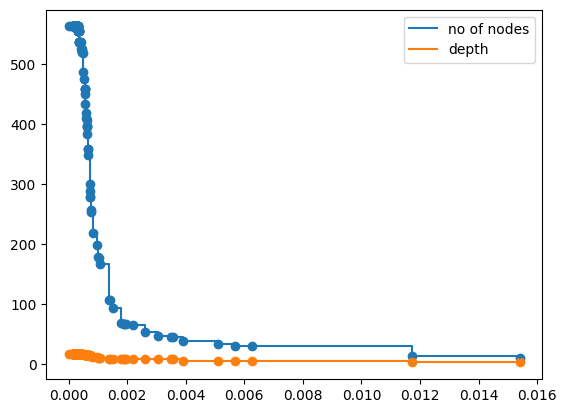

In [133]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

In [134]:
ccp_alpha = 0.0018
post_pruned_clf = DecisionTreeClassifier(random_state=2023, ccp_alpha=ccp_alpha)
post_pruned_clf.fit(X_train_norm_rmratio, y_train_rmratio)

DecisionTreeClassifier(ccp_alpha=0.0018, random_state=2023)

ccp_alpha 0.0018 provides the most appropriate balance between performances of both testing and training sets.

In [135]:
# Get depth of decision tree
depth = post_pruned_clf.tree_.max_depth
print('Depth of decision tree:', depth)

# Get number of leaf nodes of decision treepost-pruned DT with ccp_alpha 0.0018 have the highest performance
n_leaf_nodes = post_pruned_clf.tree_.n_leaves
print('Number of leaf nodes of decision tree:', n_leaf_nodes)

Depth of decision tree: 6
Number of leaf nodes of decision tree: 19


In [136]:
# Make predictions on the training data using the best decision tree
y_pred_train_post_pruned = post_pruned_clf.predict(X_train_norm_rmratio)

# Make predictions on the testing data using the best decision tree
y_pred_post_pruned = post_pruned_clf.predict(X_test_norm_rmratio)

In [137]:
#print confusion matrix for the post-pruned DT on the training data
print('Training performance of the best post_pruned decision tree: \n')
print(confusion_matrix(y_train_rmratio, y_pred_train_post_pruned))
print(classification_report(y_train_rmratio, y_pred_train_post_pruned))

Training performance of the best post_pruned decision tree: 

[[4614  145]
 [ 185  726]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4759
           1       0.83      0.80      0.81       911

    accuracy                           0.94      5670
   macro avg       0.90      0.88      0.89      5670
weighted avg       0.94      0.94      0.94      5670



In [138]:
print('Best DT post-prunning on training data: ')
print("Accuracy: ", metrics.accuracy_score(y_train_rmratio, y_pred_train_post_pruned))
print("Precision: ", metrics.precision_score(y_train_rmratio, y_pred_train_post_pruned))
print("Recall: ", metrics.recall_score(y_train_rmratio, y_pred_train_post_pruned))
print("F1: ", metrics.f1_score(y_train_rmratio, y_pred_train_post_pruned))

Best DT post-prunning on training data: 
Accuracy:  0.9417989417989417
Precision:  0.8335246842709529
Recall:  0.7969264544456641
F1:  0.8148148148148148


In [139]:
#print confusion matrix for the post-pruned DT on the test data
print('Test performance of the best post_pruned decision tree: \n')
print(confusion_matrix(y_test_rmratio, y_pred_post_pruned))
print(classification_report(y_test_rmratio, y_pred_post_pruned))

print('Best DT post-prunning: ')
print("Accuracy: ", metrics.accuracy_score(y_test_rmratio, y_pred_post_pruned))
print("Precision: ", metrics.precision_score(y_test_rmratio, y_pred_post_pruned))
print("Recall: ", metrics.recall_score(y_test_rmratio, y_pred_post_pruned))
print("F1: ", metrics.f1_score(y_test_rmratio, y_pred_post_pruned))

Test performance of the best post_pruned decision tree: 

[[1978   62]
 [  97  294]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2040
           1       0.83      0.75      0.79       391

    accuracy                           0.93      2431
   macro avg       0.89      0.86      0.87      2431
weighted avg       0.93      0.93      0.93      2431

Best DT post-prunning: 
Accuracy:  0.9345948169477581
Precision:  0.8258426966292135
Recall:  0.7519181585677749
F1:  0.78714859437751


#### DT Comparision

In [140]:
from sklearn.metrics import roc_curve, roc_auc_score

In [141]:
#Base DT get predicted probabilities for the main class
y_pred_probs_base = base_clf.predict_proba(X_test_norm_rmratio)
y_pred_probs_base = y_pred_probs_base[:, 1]

#Pre pruned DT get predicted probabilities for the main class
y_pred_probs_pre = pre_pruned_clf.predict_proba(X_test_norm_rmratio)
y_pred_probs_pre = y_pred_probs_pre[:, 1]

#Post pruned DT get predicted probabilities for the main class
y_pred_probs_post = post_pruned_clf.predict_proba(X_test_norm_rmratio)
y_pred_probs_post = y_pred_probs_post[:, 1]

In [142]:
fpr_base, tpr_base, thresholds_base = roc_curve(y_test_rmratio, y_pred_probs_base)
auc_base=metrics.auc(fpr_base, tpr_base)

fpr_pre_pruned, tpr_pre_pruned, thresholds_pre_pruned = roc_curve(y_test_rmratio, y_pred_probs_pre)
auc_pre_pruned=metrics.auc(fpr_pre_pruned, tpr_pre_pruned)

fpr_post_pruned, tpr_post_pruned, thresholds_post_pruned = roc_curve(y_test_rmratio, y_pred_probs_post)
auc_post_pruned=metrics.auc(fpr_post_pruned, tpr_post_pruned)

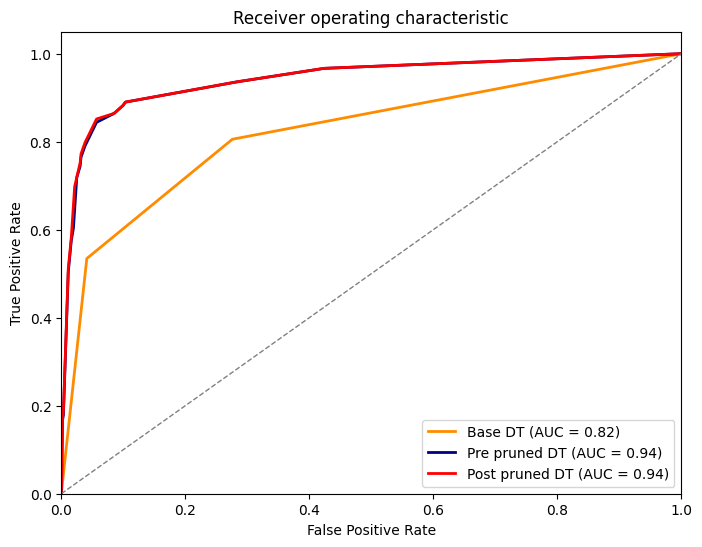

Base DT  AUC: 0.82
Pre pruned DT  AUC: 0.94
Post pruned DT  AUC: 0.94


In [143]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, color='darkorange', lw=2, label='Base DT (AUC = %0.2f)' % auc_base)
plt.plot(fpr_pre_pruned, tpr_pre_pruned, color='navy', lw=2, label='Pre pruned DT (AUC = %0.2f)' % auc_pre_pruned)
plt.plot(fpr_post_pruned, tpr_post_pruned, color='red', lw=2, label='Post pruned DT (AUC = %0.2f)' % auc_post_pruned)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute and print AUC
print('Base DT  AUC:','%.2f' %  auc_base)
print('Pre pruned DT  AUC:','%.2f' %  auc_pre_pruned)
print('Post pruned DT  AUC:','%.2f' %  auc_post_pruned)

Post-pruned DT with ccp_alpha 0.0018 have the highest performance

### 3.2.2 Cross Validation

In [144]:
#Import cross validation function
from sklearn.model_selection import cross_val_score

In [145]:
# Calculate the 95% confidence interval of the mean F1 score
def get_95ci(metric):
  n = len(metric)
  se = metric.std() / np.sqrt(n)
  t=2.262  # t-value for 95% CI and n-1 degrees of freedom, 10 folders
  ci = t * se
  return ci

In [146]:
# Perform 10-fold cross-validation
accuracy= cross_val_score(post_pruned_clf, X_rmratio, y_rmratio, cv=10)
f1 = cross_val_score(post_pruned_clf, X_rmratio, y_rmratio, cv=10, scoring=('f1'))

# Print the mean accuracy scores and 95%CI of the scores
print("Accuracy scores: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))
# Print the mean F1 scores and 95%CI of the scores
print("F1 scores: %0.3f (+/- %0.3f)" % (f1.mean(), get_95ci(f1)))


Accuracy scores: 0.930 (+/- 0.007)
F1 scores: 0.773 (+/- 0.022)


After applying cross validation, F1 slightly decreases but the model has less bias and variances.

### 3.2.3 Ensemble learner

Bootstrap, random forest and stacking are applied to improve the performance of the post-pruned DT.

#### Bootstrap Aggregation

In [147]:
#Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

In [148]:

post_pruned_clf = DecisionTreeClassifier(random_state=2023, ccp_alpha=0.0018)
# Define the ensemble classifier using bagging
ensemble_classifier_postpruned = BaggingClassifier(estimator=post_pruned_clf, n_estimators=100, random_state=2023)

# Train the ensemble classifier on the training data
ensemble_classifier.fit(X_train_norm_rmratio, y_train_rmratio)

# Make predictions on the testing data
y_pred_baggedtrees_postpruned = ensemble_classifier.predict(X_test_norm_rmratio)

In [149]:
print('DT pre-pruned after boostrap : ')
print("Accuracy: ", metrics.accuracy_score(y_test_rmratio, y_pred_baggedtrees_postpruned))
print("Precision: ", metrics.precision_score(y_test_rmratio, y_pred_baggedtrees_postpruned))
print("Recall: ", metrics.recall_score(y_test_rmratio, y_pred_baggedtrees_postpruned))
print("F1: ", metrics.f1_score(y_test_rmratio, y_pred_baggedtrees_postpruned))

DT pre-pruned after boostrap : 
Accuracy:  0.9058000822706705
Precision:  0.8214285714285714
Recall:  0.5294117647058824
F1:  0.6438569206842923


#### Random Forest

In [150]:
#Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [151]:
base_clf = DecisionTreeClassifier(max_depth=10, criterion="entropy", max_leaf_nodes=10, random_state=2023)

In [152]:
ensemble_classifier = RandomForestClassifier( n_estimators=100, max_depth=10, criterion="entropy", max_leaf_nodes=10, random_state=2023)


In [153]:
# Train the ensemble classifier on the training data
ensemble_classifier.fit(X_train_norm_rmratio, y_train_rmratio)

# Make predictions on the testing data
y_pred_randomforest = ensemble_classifier.predict(X_test_norm_rmratio)

In [154]:
print('DT after random forest : ')
print("Accuracy: ", metrics.accuracy_score(y_test_rmratio,y_pred_randomforest ))
print("Precision: ", metrics.precision_score(y_test_rmratio,y_pred_randomforest))
print("Recall: ", metrics.recall_score(y_test_rmratio,y_pred_randomforest))
print("F1: ", metrics.f1_score(y_test_rmratio,y_pred_randomforest))

DT after random forest : 
Accuracy:  0.8951048951048951
Precision:  0.9533333333333334
Recall:  0.3657289002557545
F1:  0.5286506469500925


#### Stacking

In [155]:
#Import classes and functions
from sklearn.model_selection import train_test_split

from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

In [156]:
#Define base models
estimators = [
    ('dt', DecisionTreeClassifier(ccp_alpha=0.0018)),
    ('knn', KNeighborsClassifier (n_neighbors=9))
]
#Define the meta-classifier for the stacking ensemble
meta_classifier = DecisionTreeClassifier(ccp_alpha=0.0018)


In [157]:
# Build the stacking ensemble model
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_classifier)

In [158]:
# Train the stacking ensemble model on the training set
stacking_model.fit(X_train_norm_rmratio, y_train_rmratio)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier(ccp_alpha=0.0018)),
                               ('knn', KNeighborsClassifier(n_neighbors=9))],
                   final_estimator=DecisionTreeClassifier(ccp_alpha=0.0018))

In [159]:
# Evaluate the stacking ensemble model on the testing set
y_pred = stacking_model.predict(X_test_norm_rmratio)

In [160]:
print(confusion_matrix(y_test_rmratio, y_pred))
print(classification_report(y_test_rmratio, y_pred))
print('Stacking model : ')
print("Accuracy: ", metrics.accuracy_score(y_test_rmratio, y_pred ))
print("Precision: ", metrics.precision_score(y_test_rmratio, y_pred))
print("Recall: ", metrics.recall_score(y_test_rmratio, y_pred))
print("F1: ", metrics.f1_score(y_test_rmratio, y_pred))

[[1978   62]
 [  97  294]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2040
           1       0.83      0.75      0.79       391

    accuracy                           0.93      2431
   macro avg       0.89      0.86      0.87      2431
weighted avg       0.93      0.93      0.93      2431

Stacking model : 
Accuracy:  0.9345948169477581
Precision:  0.8258426966292135
Recall:  0.7519181585677749
F1:  0.78714859437751


In [161]:
# Evaluate the stacking model using 10-fold cross validation
accuracy= cross_val_score(stacking_model, X_rmratio, y_rmratio, cv=10)
f1 = cross_val_score(stacking_model, X_rmratio, y_rmratio, cv=10, scoring=('f1'))

# Print the mean accuracy scores and 95%CI of the scores
print("Accuracy scores: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))
# Print the mean F1 scores and 95%CI of the scores
print("F1 scores: %0.3f (+/- %0.3f)" % (f1.mean(), get_95ci(f1)))

Accuracy scores: 0.930 (+/- 0.007)
F1 scores: 0.779 (+/- 0.020)


In [162]:
#Define the alternative  meta-classifier for the stacking ensemble
meta_classifier = KNeighborsClassifier(n_neighbors=9)
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_classifier)
stacking_model.fit(X_train_norm_rmratio, y_train_rmratio)
y_pred = stacking_model.predict(X_test_norm_rmratio)
print(confusion_matrix(y_test_rmratio, y_pred))
print(classification_report(y_test_rmratio, y_pred))
print('Stacking model : ')
print("Accuracy: ", metrics.accuracy_score(y_test_rmratio, y_pred ))
print("Precision: ", metrics.precision_score(y_test_rmratio, y_pred))
print("Recall: ", metrics.recall_score(y_test_rmratio, y_pred))
print("F1: ", metrics.f1_score(y_test_rmratio, y_pred))

[[1986   54]
 [ 106  285]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2040
           1       0.84      0.73      0.78       391

    accuracy                           0.93      2431
   macro avg       0.90      0.85      0.87      2431
weighted avg       0.93      0.93      0.93      2431

Stacking model : 
Accuracy:  0.9341834635952283
Precision:  0.8407079646017699
Recall:  0.7289002557544757
F1:  0.7808219178082191


In [163]:
accuracy= cross_val_score(stacking_model, X_rmratio, y_rmratio, cv=10)
f1 = cross_val_score(stacking_model, X_rmratio, y_rmratio, cv=10, scoring=('f1'))

print("Accuracy scores: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))

print("F1 scores: %0.3f (+/- %0.3f)" % (f1.mean(), get_95ci(f1)))

Accuracy scores: 0.931 (+/- 0.008)
F1 scores: 0.781 (+/- 0.024)


<a id = "cell_Comparison"></a>


## 4. Models Comparison                                             
**Summary:**
The most crucial statistic in this project is accuracy, since the better the model predicts customers' state, the more accurate and beneficial judgements VSNeobank may make.

VSNeobank also does not want a low precision score or a high false positive because if people are not closing their accounts but VSNeobank predicts they will leave, more desirable offers are provided to unneeded people, which may ruin the bank's reputation as a "cheap brand" and harm sales revenue. A low recall score, on the other hand, is gloomy because VSNeobank cannot forecast customers' departing attitudes when they are really leaving, which affects the customer attrition rate. As a result, VSNeobank must balance the two scores by maintaining a high F1 score.

#### Optimised DT: Validation after Post-pruned DT

In [164]:
print('Optimised DT : ')
accuracy= cross_val_score(post_pruned_clf, X_rmratio, y_rmratio, cv=10)
f1 = cross_val_score(post_pruned_clf, X_rmratio, y_rmratio, cv=10, scoring=('f1'))
precision = cross_val_score(post_pruned_clf, X_rmratio, y_rmratio, cv=10, scoring=('precision'))
recall = cross_val_score(post_pruned_clf, X_rmratio, y_rmratio, cv=10, scoring=('recall'))
# Print the mean accuracy scores and 95%CI of the scores
print("Accuracy scores: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))
# Print the mean F1, precision, recall scores and 95%CI of the scores
print("F1 scores: %0.3f (+/- %0.3f)" % (f1.mean(), get_95ci(f1)))
print("Precision scores: %0.3f (+/- %0.3f)" % (precision.mean(), get_95ci(f1)))
print("Recall scores: %0.3f (+/- %0.3f)" % (recall.mean(), get_95ci(f1)))

Optimised DT : 
Accuracy scores: 0.930 (+/- 0.007)
F1 scores: 0.773 (+/- 0.022)
Precision scores: 0.806 (+/- 0.022)
Recall scores: 0.744 (+/- 0.022)


#### Optimised Knn: k=9, thresthold=0.44, after boostrap:

In [165]:
print('Optimised Knn : ')
print("Accuracy: ", metrics.accuracy_score(y_test_ratio,y_pred_boostrap))
print("Precision: ", metrics.precision_score(y_test_ratio,y_pred_boostrap))
print("Recall: ", metrics.recall_score(y_test_ratio,y_pred_boostrap))
print("F1: ", metrics.f1_score(y_test_ratio,y_pred_boostrap))

Optimised Knn : 
Accuracy:  0.9062114356232003
Precision:  0.8098859315589354
Recall:  0.5447570332480819
F1:  0.6513761467889909


#### Optimised Stacking with meta_estimator is KNN after validation

In [166]:
accuracy= cross_val_score(stacking_model, X_rmratio, y_rmratio, cv=10)
f1 = cross_val_score(stacking_model, X_rmratio, y_rmratio, cv=10, scoring=('f1'))

print("Accuracy scores: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))

print("F1 scores: %0.3f (+/- %0.3f)" % (f1.mean(), get_95ci(f1)))

Accuracy scores: 0.931 (+/- 0.008)
F1 scores: 0.781 (+/- 0.024)


After applying validation, stacking with meta_estimator is KNN becomes the model having highest performance.

Regarding performance or accuracy, stacking with meta_estimator is KNN is better than post-pruned DT.

Regarding interpretability, a post-prune decision tree is more interpretable compared to stack model because the nature of mechanism of decision tree is relatively easy for human to understand, and it also allows the clear visualization. Contrastingly, the mechanism of how stacked model might easily confuse non-technical people

The complexity of stacked model will require additional cost and time of deployment and storage which is even more when KNN is meta-estimator.

Therefore, it is recommended for VSNeobank to apply pre-pruned DT model.


In [167]:
# visualize the decision tree
features = ['Age', 'Number of Dependants', 'Account Type', 'Credit Limit', 'Number of Accounts', 'Outstanding Balance', 'Total Amount of Transactions', 'Total Number of Transactions', 'Number of Contacts over 12 months', 'Months Inactive over 12 months', 'Sex_M', 'Marital Status_Married', 'Marital Status_Single', 'Marital Status_Unknown', 'Annual Income', 'Total Amount of Transactions' ]
plt.figure(figsize=(20,10))
plot_tree(post_pruned_clf, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

NotFittedError: ignored

<Figure size 2000x1000 with 0 Axes>

<a id = "cell_Technical recommendations"></a>
## 5. Technical recommendations                                        


In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(use_label_encoder=False, max_depth = 6, max_leaves = 10, random_state=2023, validate_parameters=True)

In [ ]:
model.fit(X_train_norm_rmratio, y_train_rmratio)

In [ ]:
y_pred_xgboost= model.predict(X_test_norm_rmratio)

In [ ]:
print('Xgboost application : ')
print("Accuracy: ", metrics.accuracy_score(y_test_ratio,y_pred_xgboost))
print("Precision: ", metrics.precision_score(y_test_ratio,y_pred_xgboost))
print("Recall: ", metrics.recall_score(y_test_ratio,y_pred_xgboost))
print("F1: ", metrics.f1_score(y_test_ratio,y_pred_xgboost))

XGBoost is an alternative decision tree software library. In terms of performance, XGBoost tends to provide better results. However, it is specialised gradient boosting models that enable optimised gradient boosting tree implementations, therefore it is only appropriate for a restricted number of models. Scikit-learn, on the other hand, may encompass a greater spectrum of machine learning techniques.

## 6. Model deployment





### Import pickle and save the optimised model

In [ ]:
import pandas as pd

In [ ]:
post_pruned_clf = DecisionTreeClassifier(random_state=2023, ccp_alpha=0.0018)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pickle

In [ ]:
#save the post pruned DT
path = '/content/drive/MyDrive/Optimised model for VSNeoBank.pickle'
with open(path, 'wb') as f:
    pickle.dump(post_pruned_clf, f)

## Recommendations

### Technical recommendations

Because of the nature of data, particularly in the banking business, datasets tend to be dusty, noisy, or missing; consequently, investment in data cleaning and missing data management is required.

Furthermore, it is recommended for VSNeoBank to adopt the Post-pruned Decision Tree after validation to predict their customers' status. However, since the decision tree may vary significantly owing to minor changes in input, the model must be regularly integrated and updated in order to be relevant for new datasets. As a consequence, experimenting with various hyperparameters may aid in determining the optimal match. Furthermore, cross validation and grid search are highly suggested to increase model performance and reduce bias.

### Non-technical recommendations

To enhance active accounts, VSNeobank should encourage customers to increase their amount money in their transactions which might be archived through promotions with specific requirements of money involved in transaction to stimulate customers; lower transaction fees application for large transactions and so on.

The more customers contact over 12 months, the more likely they close their accounts indicating that VSNeobank should focus on the customer’s recent experience. It is essential to quickly solve the problems of customers which doesn’t result in any extra contacts later on, training on customers services to improve efficiency and accuracy in services also needs to be considered.

VSNeoBank's customers could be divided into 3 classes, based on each group's interests, VSNeobank should personalize their products and services to address their customers' behaviors, which is only feasible if VSNeoBank constantly and attentively solicit feedback from customers.

VSNeobank is recommended to revise marketing campaigns, relationship with Gen Z customers and business direction because the data is showing VSNeobank is targeting to older, married customers which are wrong. More projects and customized offers and promotions should be implemented to attract Gen Z customers.


